In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing  

In [2]:
df1 = pd.read_csv("games_metadata_profile_2024_01.csv")
df2 = pd.read_csv("games_metadata_profile.csv")
pd.options.display.max_columns = None

In [3]:
games = pd.concat([df1, df2], axis=0, ignore_index=True)
games

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,White_tosViolation,White_profile_flag,White_createdAt,White_playTime_total,White_count_all,White_title,Black,BlackElo,BlackRatingDiff,Black_is_deleted,Black_tosViolation,Black_profile_flag,Black_createdAt,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result,Unnamed: 0
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,False,NaN,NaN,1.646943e+12,5743321.0,8428.0,NaN,saiyank_24,1492,7.0,False,NaN,NaN,1.687320e+12,1410838.0,2700.0,NaN,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1,NaN
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,False,NaN,GB,1.521151e+12,1395490.0,3160.0,NaN,tausgang,1155,-7.0,False,NaN,DE,1.585999e+12,2091417.0,4924.0,NaN,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0,NaN
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,False,NaN,NaN,1.676814e+12,384800.0,792.0,NaN,xiangqishogichess,1641,5.0,False,NaN,NaN,1.594784e+12,1424148.0,4085.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1,NaN
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,False,NaN,NaN,1.694284e+12,1154156.0,2352.0,NaN,Depth25,2307,5.0,False,NaN,NaN,1.688279e+12,1195075.0,1772.0,NaN,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1,NaN
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,False,NaN,NaN,1.628263e+12,886600.0,1684.0,NaN,aymenaymenaymenaymen,1214,-6.0,False,NaN,NaN,1.673813e+12,332692.0,576.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207474,4459,Rated Bullet game,NaN,https://lichess.org/QBOvqZbq,2017.05.31,21:55:29,imendez10,1447,14.0,True,False,NaN,NaN,NaN,NaN,NaN,Evenflow,1564,-12.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.27] [%clk 0:01:00]} Nf6 {[%eval 0...,83,B02,Alekhine Defense: John Tracy Gambit,60+0,NaN,1-0,4458.0
207475,4460,Rated Blitz game,NaN,https://lichess.org/TpZwTtwf,2017.05.31,21:56:18,quiq,1380,-10.0,True,False,NaN,NaN,NaN,NaN,NaN,DrManhi1992,1393,10.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.41] [%clk 0:03:00]} c6 {[%eval 0....,46,B10,Caro-Kann Defense,180+0,NaN,0-1,4459.0
207476,4461,Rated Blitz game,NaN,https://lichess.org/DHATiQa1,2017.05.31,21:56:37,carolinem594,1160,49.0,True,False,NaN,NaN,NaN,NaN,NaN,ederguillermo,1026,-7.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.24] [%clk 0:05:00]} e5 {[%eval 0....,53,C60,Ruy Lopez,300+0,NaN,1-0,4460.0
207477,4462,Rated Bullet game,NaN,https://lichess.org/aaHBdieo,2017.05.31,21:58:10,pemikan,1528,-10.0,True,False,NaN,NaN,NaN,NaN,NaN,Evenflow,1552,8.0,True,False,NaN,NaN,NaN,NaN,NaN,d4 {[%eval 0.11] [%clk 0:01:00]} Nf6 {[%eval 0...,72,D06,Queen's Gambit Refused: Marshall Defense,60+0,NaN,0-1,4461.0


# Preprocessing

In [4]:
games = games.sample(frac=1).reset_index(drop=True)

games.drop(['GameID',"Site","White_playTime_total","Black_playTime_total","Black_createdAt","White_createdAt","White_is_deleted","Round",
            "Black_is_deleted","White_tosViolation","Black_tosViolation","Black_profile_flag","White_profile_flag",
           "White_title","Black_title","BlackRatingDiff","WhiteRatingDiff","White","Black"], axis = 1, inplace = True)
games = games.loc[:, ~games.columns.str.contains('^Unnamed')]
mean_value1 = games['Black_count_all'].mean() 
mean_value2 = games["White_count_all"].mean()
games['Black_count_all'].fillna(value=mean_value1, inplace=True)
games["Black_count_all"]=games["Black_count_all"].astype(int)
games["White_count_all"].fillna(value=mean_value2, inplace=True)
games["White_count_all"]=games["White_count_all"].astype(int)

C:\Users\Berk\AppData\Local\Temp\ipykernel_13136\1743271468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Black_count_all'].fillna(value=mean_value1, inplace=True)
C:\Users\Berk\AppData\Local\Temp\ipykernel_13136\1743271468.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [5]:
games = games[~games['Event'].str.contains('lichess')]
games = games[~games['Event'].str.contains('Corres')]
games = games[~games['Event'].str.contains('UltraB')]
games = games[~games['Event'].str.contains('Bullet')]
games.dropna(subset = ['BlackElo', 'WhiteElo',"White_count_all","Black_count_all","Result"])
games = games.reset_index(drop=True)
games

,Event,Date,Time,WhiteElo,White_count_all,BlackElo,Black_count_all,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,Rated Blitz game,2017.05.30,11:42:20,2313,14220,2042,11555,e4 {[%eval 0.41] [%clk 0:03:00]} d6 {[%eval 0....,71,B06,Modern Defense: Standard Defense,180+0,NaN,1-0
1,Rated Rapid game,2024.01.05,13:35:50,996,1745,1083,245,1. d4 { [%eval 0.13] [%clk 0:10:00] } 1... d5 ...,29,D20,Queen's Gambit Accepted: Saduleto Variation,600+0,Normal,1-0
2,Rated Rapid game,2024.01.11,16:51:23,1349,516,1214,435,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,32,C50,Italian Game: Giuoco Piano,600+5,Normal,0-1
3,Rated Rapid game,2024.01.05,23:04:48,1158,25,1337,378,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... c5 {...,44,B47,"Sicilian Defense: Taimanov Variation, Bastriko...",900+10,Normal,0-1
4,Rated Rapid game,2024.01.04,19:38:49,2135,1143,2285,299,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,74,C54,"Italian Game: Classical Variation, Giuoco Pian...",600+0,Normal,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145500,Rated Rapid game,2024.01.21,19:42:07,1626,916,1580,15285,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... e5 {...,201,C50,Italian Game: Anti-Fried Liver Defense,900+10,Normal,1/2-1/2
145501,Rated Blitz game,2017.05.19,16:54:03,1626,10948,1610,1862,e4 {[%eval 0.15] [%clk 0:05:00]} d5 {[%eval 0....,51,B01,Scandinavian Defense: Mieses-Kotroc Variation,300+3,NaN,1-0
145502,Rated Blitz game,2024.01.08,21:37:49,1764,2084,1751,1011,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... d6?!...,54,B07,King's Pawn Game: Maróczy Defense,180+2,Time forfeit,0-1
145503,Rated Rapid game,2024.01.31,17:23:48,1598,11356,1568,7461,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5 {...,37,B01,Scandinavian Defense: Valencian Variation,600+0,Normal,1-0


In [6]:
games.describe()

,WhiteElo,White_count_all,BlackElo,Black_count_all,TotalMoves
count,145505.000000,1.455050e+05,145505.00000,1.455050e+05,145505.000000
mean,1608.441339,8.283558e+03,1608.60044,8.497240e+03,66.357376
std,372.023691,2.278334e+04,372.19704,2.767001e+04,29.012049
min,400.000000,1.000000e+00,400.00000,1.000000e+00,5.000000
25%,1357.000000,9.080000e+02,1355.00000,9.160000e+02,46.000000
50%,1601.000000,3.656000e+03,1603.00000,3.659000e+03,61.000000
75%,1854.000000,1.135600e+04,1855.00000,1.155500e+04,81.000000
max,2966.000000,1.775580e+06,2983.00000,1.775580e+06,317.000000


In [7]:
def eco_opening(eco_code):
    if eco_code in ['A00']:
        return 'Benko Opening & Miscellaneous'
    elif eco_code in ['A01', 'A02', 'A03']:
        return "Bird's Opening"
    elif eco_code in ['A04', 'A05', 'A07', 'A08', 'A09']:
        return 'Reti Opening'
    elif eco_code in ['A06']:
        return 'Nimzovich-Larsen Attack'
    elif eco_code in ['A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19']:
        return 'English Opening'
    elif eco_code in ['A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29']:
        return 'English Opening, Closed'
    elif eco_code in ['A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39']:
        return 'English Opening, Symmetrical'
    elif eco_code in ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49']:
        return "Queen's Pawn Opening"
    elif eco_code in ['A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59']:
        return 'Indian Systems'
    elif eco_code in ['A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69']:
        return 'Benoni Defense'
    elif eco_code in ['A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79']:
        return 'Benoni Defense, Modern'
    elif eco_code in ['A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89']:
        return 'Dutch Defense'
    elif eco_code in ['A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99']:
        return 'Dutch Defense, Stonewall'
    
    #ECO B
    elif eco_code in ['B00']:
        return "King's Pawn Opening"
    elif eco_code in ['B01']:
        return 'Scandinavian Defense'
    elif eco_code in ['B02', 'B03', 'B04', 'B05']:
        return "Alekhine's Defense"
    elif eco_code in ['B06']:
        return 'Robatsch (Modern) Defense'
    elif eco_code in ['B07', 'B08', 'B09']:
        return 'Pirc Defense'
    elif eco_code in ['B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19']:
        return 'Caro-Kann Defense'
    elif eco_code in ['B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29']:
        return 'Sicilian Defense, Miscellaneous'
    elif eco_code in ['B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39']:
        return 'Sicilian Defense, Closed'
    elif eco_code in ['B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49']:
        return 'Sicilian Defense, Four Knights / Taimanov'
    elif eco_code in ['B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59']:
        return 'Sicilian Defense, Scheveningen / Classical'
    elif eco_code in ['B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69']:
        return 'Sicilian Defense, Richter-Rauzer'
    elif eco_code in ['B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79']:
        return 'Sicilian Defense, Dragon'
    elif eco_code in ['B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89']:
        return 'Sicilian Defense, Scheveningen'
    elif eco_code in ['B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99']:
        return 'Sicilian Defense, Najdorf'
    
    #ECO C
    elif eco_code in ['C00']:
        return 'French Defense'
    elif eco_code in ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09']:
        return 'French Defense, Variations'
    elif eco_code in ['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19']:
        return 'French Defense, Advanced Variations'
    elif eco_code in ['C20', 'C21', 'C22']:
        return "King's Pawn Game"
    elif eco_code in ['C23', 'C24']:
        return "Bishop's Opening"
    elif eco_code in ['C25', 'C26', 'C27', 'C28', 'C29']:
        return "Vienna Game"
    elif eco_code in ['C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39']:
        return "King's Gambit"
    elif eco_code in ['C40', 'C41', 'C42', 'C43', 'C44']:
        return 'Philidor Defense / Petrov Defense'
    elif eco_code in ['C45']:
        return 'Scotch Game'
    elif eco_code in ['C46', 'C47', 'C48', 'C49']:
        return 'Four Knights Game'
    elif eco_code in ['C50', 'C51', 'C52']:
        return 'Italian Game / Giuoco Piano'
    elif eco_code in ['C53', 'C54']:
        return 'Giuoco Piano, Classical'
    elif eco_code in ['C55', 'C56', 'C57', 'C58', 'C59']:
        return 'Two Knights Defense'
    elif eco_code in ['C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69']:
        return 'Ruy Lopez'
    
    #ECO D
    elif eco_code in ['D00']:
        return "Queen's Pawn Game"
    elif eco_code in ['D01', 'D02', 'D03', 'D04']:
        return "Torre Attack / Colle System"
    elif eco_code in ['D05', 'D06', 'D07', 'D08', 'D09']:
        return "Queen's Gambit Declined"
    elif eco_code in ['D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19']:
        return "Slav Defense"
    elif eco_code in ['D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29']:
        return "Queen's Gambit Accepted"
    elif eco_code in ['D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39']:
        return "Queen's Gambit, Tarrasch"
    elif eco_code in ['D40', 'D41', 'D42', 'D43', 'D44', 'D45']:
        return "Semi-Tarrasch Defense"
    elif eco_code in ['D46', 'D47', 'D48', 'D49']:
        return "Semi-Slav Defense"
    elif eco_code in ['D50', 'D51', 'D52', 'D53', 'D54']:
        return "Queen's Gambit Declined, Cambridge Springs"
    elif eco_code in ['D55', 'D56', 'D57', 'D58', 'D59']:
        return "Queen's Gambit Declined, Orthodox"
    elif eco_code in ['D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69']:
        return "Grünfeld Defense"
    elif eco_code in ['D70', 'D71', 'D72', 'D73', 'D74', 'D75', 'D76', 'D77', 'D78', 'D79']:
        return "King's Indian Defense, Classical"
    elif eco_code in ['D80', 'D81', 'D82', 'D83', 'D84', 'D85', 'D86', 'D87', 'D88', 'D89']:
        return "King's Indian Defense, Sämisch"
    elif eco_code in ['D90', 'D91', 'D92', 'D93', 'D94', 'D95', 'D96', 'D97', 'D98', 'D99']:
        return "King's Indian Defense, Miscellaneous"
    
    #ECO E
    elif eco_code in ['E00', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09']:
        return "Catalan Opening"
    elif eco_code in ['E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19']:
        return "Queen's Indian Defense"
    elif eco_code in ['E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29']:
        return "Nimzo-Indian Defense"
    elif eco_code in ['E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39']:
        return "King's Indian Defense, Averbakh"
    elif eco_code in ['E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49']:
        return "Nimzo-Indian Defense, Rubinstein"
    elif eco_code in ['E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59']:
        return "Nimzo-Indian Defense, Classical"
    elif eco_code in ['E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69']:
        return "King's Indian Defense"
    elif eco_code in ['E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79']:
        return "King's Indian Defense, Fianchetto"
    elif eco_code in ['E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89']:
        return "King's Indian Defense, Sämisch"
    elif eco_code in ['E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99']:
        return "King's Indian Defense, Miscellaneous"

    else:
        return "Unknown Opening"
        


games['Openings'] = games['ECO'].apply(eco_opening)
games['Openings'].value_counts()

Openings
Philidor Defense / Petrov Defense    11675
Queen's Pawn Opening                 11041
Sicilian Defense, Miscellaneous       8478
Caro-Kann Defense                     8060
Queen's Pawn Game                     6375
                                     ...  
Semi-Slav Defense                       67
Dutch Defense, Stonewall                59
Grünfeld Defense                        47
Benoni Defense, Modern                  45
Sicilian Defense, Richter-Rauzer        44
Name: count, Length: 64, dtype: int64

In [8]:
games

,Event,Date,Time,WhiteElo,White_count_all,BlackElo,Black_count_all,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result,Openings
0,Rated Blitz game,2017.05.30,11:42:20,2313,14220,2042,11555,e4 {[%eval 0.41] [%clk 0:03:00]} d6 {[%eval 0....,71,B06,Modern Defense: Standard Defense,180+0,NaN,1-0,Robatsch (Modern) Defense
1,Rated Rapid game,2024.01.05,13:35:50,996,1745,1083,245,1. d4 { [%eval 0.13] [%clk 0:10:00] } 1... d5 ...,29,D20,Queen's Gambit Accepted: Saduleto Variation,600+0,Normal,1-0,Queen's Gambit Accepted
2,Rated Rapid game,2024.01.11,16:51:23,1349,516,1214,435,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,32,C50,Italian Game: Giuoco Piano,600+5,Normal,0-1,Italian Game / Giuoco Piano
3,Rated Rapid game,2024.01.05,23:04:48,1158,25,1337,378,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... c5 {...,44,B47,"Sicilian Defense: Taimanov Variation, Bastriko...",900+10,Normal,0-1,"Sicilian Defense, Four Knights / Taimanov"
4,Rated Rapid game,2024.01.04,19:38:49,2135,1143,2285,299,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,74,C54,"Italian Game: Classical Variation, Giuoco Pian...",600+0,Normal,0-1,"Giuoco Piano, Classical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145500,Rated Rapid game,2024.01.21,19:42:07,1626,916,1580,15285,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... e5 {...,201,C50,Italian Game: Anti-Fried Liver Defense,900+10,Normal,1/2-1/2,Italian Game / Giuoco Piano
145501,Rated Blitz game,2017.05.19,16:54:03,1626,10948,1610,1862,e4 {[%eval 0.15] [%clk 0:05:00]} d5 {[%eval 0....,51,B01,Scandinavian Defense: Mieses-Kotroc Variation,300+3,NaN,1-0,Scandinavian Defense
145502,Rated Blitz game,2024.01.08,21:37:49,1764,2084,1751,1011,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... d6?!...,54,B07,King's Pawn Game: Maróczy Defense,180+2,Time forfeit,0-1,Pirc Defense
145503,Rated Rapid game,2024.01.31,17:23:48,1598,11356,1568,7461,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5 {...,37,B01,Scandinavian Defense: Valencian Variation,600+0,Normal,1-0,Scandinavian Defense


In [9]:
def categorize_elo(elo):
    if elo < 1300:
        return 'Beginner'
    elif elo < 1700:
        return 'Intermediate'
    elif elo < 2100:
        return 'Advanced'
    else:
        return 'Expert'

games['White_Elo_Group'] = games['WhiteElo'].apply(categorize_elo)
games['Black_Elo_Group'] = games['BlackElo'].apply(categorize_elo)

print(games[['White_Elo_Group', 'Black_Elo_Group']].head())

  White_Elo_Group Black_Elo_Group
0          Expert        Advanced
1        Beginner        Beginner
2    Intermediate        Beginner
3        Beginner    Intermediate
4          Expert          Expert


In [10]:
import re
# Eval değerlerini yeni bir sütuna çıkarmak
games['Eval'] = games['Moves'].apply(lambda x: re.findall(r'\[%eval (.*?)\]', x))
games["Eval"][2]

['0.2',
 '0.17',
 '0.21',
 '0.32',
 '0.17',
 '0.2',
 '0.21',
 '0.21',
 '0.07',
 '0.21',
 '0.11',
 '0.29',
 '0.21',
 '0.35',
 '0.34',
 '0.36',
 '-0.03',
 '-0.03',
 '-1.9',
 '-1.99',
 '-1.75',
 '-0.19',
 '-1.16',
 '0.0',
 '#-4',
 '#-3',
 '#-3',
 '#-2',
 '#-2',
 '#-1',
 '#-1']

In [11]:
import re

def remove_eval_notation(move):
    if isinstance(move, str):  
        cleaned_move = re.sub(r'\{?\s*\[%eval .*?\]\}?', '', move).strip()
        return cleaned_move
    return move  

games['Moves_cleaned'] = games['Moves'].apply(remove_eval_notation)
remaining_eval = games[games['Moves_cleaned'].str.contains(r'\[%eval', na=False)]

if not remaining_eval.empty:
    print(f"Uyarı: {len(remaining_eval)} satırda hala eval notasyonları var.")
else:
    print("Eval notasyonları kaldırıldı")


Eval notasyonları başarıyla kaldırıldı!


In [12]:
games["Moves_cleaned"][5]

'1. e4  [%clk 0:03:00] } 1... e5  [%clk 0:03:00] } 2. Nf3  [%clk 0:02:58] } 2... Nf6  [%clk 0:02:59] } 3. Nc3  [%clk 0:02:56] } 3... Nc6  [%clk 0:02:58] } 4. Bb5  [%clk 0:02:55] } 4... Nd4  [%clk 0:02:57] } 5. Nxd4  [%clk 0:02:53] } 5... exd4  [%clk 0:02:57] } 6. Ne2?!  [%clk 0:02:52] } 6... c6?!  [%clk 0:02:57] } 7. Ba4?!  [%clk 0:02:47] } 7... a5?!  [%clk 0:02:57] } 8. c3?  [%clk 0:02:44] } 8... d3?  [%clk 0:02:53] } 9. Nf4?  [%clk 0:02:39] } 9... Bd6?  [%clk 0:02:47] } 10. Nxd3?  [%clk 0:02:38] } 10... Nxe4?  [%clk 0:02:45] } 11. O-O?  [%clk 0:02:36] } 11... O-O?  [%clk 0:02:43] } 12. Bc2?  [%clk 0:02:34] } 12... b5?  [%clk 0:02:40] } 13. Ne1?  [%clk 0:02:32] } 13... Nf6?  [%clk 0:02:36] } 14. d4?  [%clk 0:02:27] } 14... Ba6?  [%clk 0:02:35] } 15. Nf3?  [%clk 0:02:18] } 15... b4?  [%clk 0:02:32] } 16. Re1?  [%clk 0:02:15] } 16... bxc3?  [%clk 0:02:31] } 17. bxc3?  [%clk 0:02:14] } 17... Nd5?!  [%clk 0:02:26] } 18. Bg5?!  [%clk 0:02:07] } 18... f6?!  [%clk 0:02:24] } 19. Bh4?  [%clk 

In [13]:
def remove_time_notation(moves):
    return re.sub(r'\[%clk \d+:\d+:\d+\]', '', moves)
games['Moves_cleaned'] = games['Moves_cleaned'].apply(remove_time_notation)
games["Moves_cleaned"][5]

'1. e4   } 1... e5   } 2. Nf3   } 2... Nf6   } 3. Nc3   } 3... Nc6   } 4. Bb5   } 4... Nd4   } 5. Nxd4   } 5... exd4   } 6. Ne2?!   } 6... c6?!   } 7. Ba4?!   } 7... a5?!   } 8. c3?   } 8... d3?   } 9. Nf4?   } 9... Bd6?   } 10. Nxd3?   } 10... Nxe4?   } 11. O-O?   } 11... O-O?   } 12. Bc2?   } 12... b5?   } 13. Ne1?   } 13... Nf6?   } 14. d4?   } 14... Ba6?   } 15. Nf3?   } 15... b4?   } 16. Re1?   } 16... bxc3?   } 17. bxc3?   } 17... Nd5?!   } 18. Bg5?!   } 18... f6?!   } 19. Bh4?   } 19... Nxc3?   } 20. Qd2?   } 20... Bb4?   } 21. Re3?   } 21... Nd5?   } 22. Qc1?   } 22... Nxe3?   } 23. Qxe3?   } 23... Re8?!   } 24. Qb3+?!   } 24... Kh8?   } 25. Bd3?   } 25... Bb7??   } 26. Qc2?   } 26... h6?!   } 27. Ne5?!   } 27... Qe7??   } 28. Qb3??   } 28... Qe6??   } 29. Ng6+??   } 29... Kg8??   } 30. Bc4??   } 30... d5??   } 31. Nf4?   } 31... dxc4?   } 0-1'

In [14]:
games["Moves_cleaned"][25]

'1. g3   } 1... Nf6   } 2. Bg2   } 2... Nc6   } 3. b3?!   } 3... a5?!   } 4. Bb2?!   } 4... Ra6?!   } 5. d3?!   } 5... h5?!   } 6. e4?!   } 6... Rh6?   } 7. Nf3?!   } 7... Ng4?   } 8. O-O?!   } 8... Nb4?   } 9. h3?   } 9... Nf6?   } 10. c3?   } 10... Nc6?   } 11. Ng5?   } 11... e5?   } 12. d4?   } 12... exd4?   } 13. cxd4?   } 13... Bb4?   } 14. Nc3?   } 14... Bxc3?   } 15. Bxc3?   } 15... Nb4?   } 16. Bxb4?   } 16... axb4?   } 17. e5?   } 17... Nh7?   } 18. Nxh7?   } 18... Rxh7?   } 19. Bd5?   } 19... c6?   } 20. Bc4?   } 20... d5?   } 21. exd6?   } 21... Ra5?   } 22. Qf3??   } 22... c5??   } 23. Qxf7#?? {  } 1-0'

In [15]:
games['Moves_cleaned'] = games['Moves_cleaned'].str.replace(r'(1-0|0-1|1/2-1/2)', '', regex=True).str.strip()
games["Moves_cleaned"][50645]

'1. e4   } 1... e5   } 2. Nf3   } 2... f6?   } 3. Nc3?   } 3... Qe7?   } 4. Bc4?   } 4... c6?   } 5. d3?   } 5... h6?   } 6. O-O?   } 6... b6?   } 7. Be3?   } 7... d6?   } 8. d4?   } 8... exd4?   } 9. Bxd4?   } 9... Kd8?   } 10. Re1?   } 10... Nd7?   } 11. b4?   } 11... b5?   } 12. Bb3?   } 12... Ne5?   } 13. Nxe5?   } 13... fxe5?   } 14. Be3?   } 14... g5?   } 15. g4?   } 15... Kc7?   } 16. a4?   } 16... Ba6??   } 17. axb5??   } 17... cxb5?   } 18. Rxa6?   } 18... Qd7?   } 19. Nxb5+?   } 19... Qxb5?   } 20. Ra5?   } 20... Qxb4?   } 21. Rd5?   } 21... Qxe4?   } 22. Rd2??   } 22... Qb4?   } 23. Bd5?   } 23... Rd8?   } 24. Qa1?   } 24... a5??   } 25. c3??   } 25... Qb8??   } 26. Qxa5+??   } 26... Kd7??   } 27. Qa4+??   } 27... Ke7??   } 28. Red1?   } 28... Nf6?   } 29. Bb3?   } 29... d5?   } 30. Bc5+?   } 30... Ke6?   } 31. Qa6+??   } 31... Kf7??   } 32. c4??   } 32... Bxc5??   } 33. cxd5?   } 33... Qxb3?   } 34. Qa7+??   } 34... Kg6??   } 35. Qxc5??   } 35... Ne4??   } 36. Qc6+??   } 36

In [16]:
games['Moves_cleaned'] = games['Moves_cleaned'].apply(lambda x: re.sub(r'\d+\.{3}', '', x).strip())
games["Moves_cleaned"][50645]

'1. e4   }  e5   } 2. Nf3   }  f6?   } 3. Nc3?   }  Qe7?   } 4. Bc4?   }  c6?   } 5. d3?   }  h6?   } 6. O-O?   }  b6?   } 7. Be3?   }  d6?   } 8. d4?   }  exd4?   } 9. Bxd4?   }  Kd8?   } 10. Re1?   }  Nd7?   } 11. b4?   }  b5?   } 12. Bb3?   }  Ne5?   } 13. Nxe5?   }  fxe5?   } 14. Be3?   }  g5?   } 15. g4?   }  Kc7?   } 16. a4?   }  Ba6??   } 17. axb5??   }  cxb5?   } 18. Rxa6?   }  Qd7?   } 19. Nxb5+?   }  Qxb5?   } 20. Ra5?   }  Qxb4?   } 21. Rd5?   }  Qxe4?   } 22. Rd2??   }  Qb4?   } 23. Bd5?   }  Rd8?   } 24. Qa1?   }  a5??   } 25. c3??   }  Qb8??   } 26. Qxa5+??   }  Kd7??   } 27. Qa4+??   }  Ke7??   } 28. Red1?   }  Nf6?   } 29. Bb3?   }  d5?   } 30. Bc5+?   }  Ke6?   } 31. Qa6+??   }  Kf7??   } 32. c4??   }  Bxc5??   } 33. cxd5?   }  Qxb3?   } 34. Qa7+??   }  Kg6??   } 35. Qxc5??   }  Ne4??   } 36. Qc6+??   }  Kh7??   } 37. Qc7+?   }  Kg6?   } 38. Qc6+?   }  Nf6?   } 39. d6?   }  Qb4?   } 40. d7?!   }  Qxg4+?!   } 41. Kf1?!   }  Qh3+?!   } 42. Ke1?!   }  Qxh2?!   } 43. Rd6?!

In [17]:
games['Moves_cleaned'] = games['Moves_cleaned'].str.replace(r'[?"{""}"!+*]', '', regex=True)
games["Moves_cleaned"][0]

'e4   d6   d4   g6   Nc3   Bg7   Be3   Nf6   h3   O-O   Qd2   a6   a4   b6   Nf3   Bb7   Bd3   Nbd7   O-O   e5   Bh6   exd4   Nxd4   Ne5   Bxg7   Kxg7   f4   Nxd3   cxd3   c5   Nf3   Qc7   f5   Rae8   Rf2   Nd7   Raf1   f6   fxg6   hxg6   Qf4   Ne5   Nxe5   dxe5   Qg3   Qe7   Nd1   Qe6   Ne3   b5   axb5   axb5   Ng4   c4   Nxf6   Rxf6   Rxf6   Qxf6   Rxf6   Kxf6   dxc4   bxc4   Qf2   Kg7   Qb6   Re7   Qd6   Kf7   Qc5   Bxe4   Qxc4  '

In [18]:
games["Moves_cleaned"][225]

'1. e4     e6    2. Nf3     d5    3. d3     dxe4    4. dxe4     Qxd1    5. Kxd1     Nf6    6. Bb5     c6    7. Bd3     Ng4    8. Ke2     Bc5    9. Nc3     Nxf2    10. Rf1     Nxd3    11. Kxd3     O-O    12. Na4     Rd8    13. Ke2     Be7    14. Bg5     Bxg5    15. Nxg5     b6    16. Rad1     Ba6    17. Kf3     Rxd1    18. Rxd1     f6    19. Rd8#   '

In [19]:
games['Moves_cleaned'] = games['Moves_cleaned'].apply(lambda x: re.sub(r'\d+\.\s*', '', x))
games["Moves_cleaned"][45068]

'd4     d5    c4     e5    dxe5     d4    Nf3     c5    g3     Nc6    a3     Qc7    Bd2     Nxe5    b4     Nxf3    exf3     b6    Bf4     Bd6    Qe2     Be6    Bxd6     Qxd6    f4     Nf6    Bg2     Rd8    f5     d3    Qe3     d2    Nxd2     Qxd2    Qxd2     Rxd2    Kxd2     Bxf5    Rhe1     Be6    f4     O-O    Rad1     Bxc4    Kc3     Be6    bxc5     bxc5    Rd6     c4    Bf1     Rc8    Red1     Ne4    Kc2     Nxd6    Rxd6     h6    Ra6     Rc7    Kc3     g6    Ra4     Kg7    Bxc4     Kf6    Kd3     Bf5    Kc3     Be6    Kb3     Rb7    Rb4     Bxc4    Kxc4     Re7    Kb5     Re6    a4     Re2    Ka6     Rxh2    Kxa7     Ra2    Ka6     Kf5    a5     Kg4    Rb3     Rd2    Ka7     Rd7    Rb7     Rd6    a6     Kxg3    Rxf7     h5    Kb7     Rd1    a7     Ra1    a8=Q     Rxa8    Kxa8     h4    Rf6     h3    Rxg6     Kxf4    Rf6     Kg3    Rg6     Kf3   '

In [20]:
games["Moves_cleaned"][0]

'e4   d6   d4   g6   Nc3   Bg7   Be3   Nf6   h3   O-O   Qd2   a6   a4   b6   Nf3   Bb7   Bd3   Nbd7   O-O   e5   Bh6   exd4   Nxd4   Ne5   Bxg7   Kxg7   f4   Nxd3   cxd3   c5   Nf3   Qc7   f5   Rae8   Rf2   Nd7   Raf1   f6   fxg6   hxg6   Qf4   Ne5   Nxe5   dxe5   Qg3   Qe7   Nd1   Qe6   Ne3   b5   axb5   axb5   Ng4   c4   Nxf6   Rxf6   Rxf6   Qxf6   Rxf6   Kxf6   dxc4   bxc4   Qf2   Kg7   Qb6   Re7   Qd6   Kf7   Qc5   Bxe4   Qxc4  '

In [21]:
def split_moves(moves):
    moves = moves.split() 
    white_moves = moves[::2]  
    black_moves = moves[1::2]  
    
    return pd.Series([white_moves, black_moves])

games[['WhiteMoves', 'BlackMoves']] = games['Moves_cleaned'].apply(split_moves)
games

,Event,Date,Time,WhiteElo,White_count_all,BlackElo,Black_count_all,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result,Openings,White_Elo_Group,Black_Elo_Group,Eval,Moves_cleaned,WhiteMoves,BlackMoves
0,Rated Blitz game,2017.05.30,11:42:20,2313,14220,2042,11555,e4 {[%eval 0.41] [%clk 0:03:00]} d6 {[%eval 0....,71,B06,Modern Defense: Standard Defense,180+0,NaN,1-0,Robatsch (Modern) Defense,Expert,Advanced,"[0.41, 0.43, 0.41, 0.54, 0.45, 0.45, 0.49, 0.4...",e4 d6 d4 g6 Nc3 Bg7 Be3 Nf6 h3...,"[e4, d4, Nc3, Be3, h3, Qd2, a4, Nf3, Bd3, O-O,...","[d6, g6, Bg7, Nf6, O-O, a6, b6, Bb7, Nbd7, e5,..."
1,Rated Rapid game,2024.01.05,13:35:50,996,1745,1083,245,1. d4 { [%eval 0.13] [%clk 0:10:00] } 1... d5 ...,29,D20,Queen's Gambit Accepted: Saduleto Variation,600+0,Normal,1-0,Queen's Gambit Accepted,Beginner,Beginner,"[0.13, 0.27, 0.0, 0.33, 0.0, 8.9, 1.7, 5.06, 5...",d4 d5 c4 dxc4 e4 Bf5 Nc3 ...,"[d4, c4, e4, Nc3, Qxg4, Qd1, Bg5, e5, bxc3, Bh...","[d5, dxc4, Bf5, Bg4, Nf6, e6, Bb4, Bxc3, h6, g..."
2,Rated Rapid game,2024.01.11,16:51:23,1349,516,1214,435,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,32,C50,Italian Game: Giuoco Piano,600+5,Normal,0-1,Italian Game / Giuoco Piano,Intermediate,Beginner,"[0.2, 0.17, 0.21, 0.32, 0.17, 0.2, 0.21, 0.21,...",e4 e5 Nf3 Nc6 Bc4 Bc5 O-O...,"[e4, Nf3, Bc4, O-O, d3, h3, c3, Bxe6, Qe1, Be3...","[e5, Nc6, Bc5, Nf6, d6, O-O, Be6, fxe6, Nh5, R..."
3,Rated Rapid game,2024.01.05,23:04:48,1158,25,1337,378,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... c5 {...,44,B47,"Sicilian Defense: Taimanov Variation, Bastriko...",900+10,Normal,0-1,"Sicilian Defense, Four Knights / Taimanov",Beginner,Intermediate,"[0.2, 0.33, 0.24, 0.41, 0.23, 0.24, 0.4, 0.35,...",e4 c5 Nc3 Nc6 Nf3 Qc7 d4 ...,"[e4, Nc3, Nf3, d4, Nxd4, g3, Bf4, e5, Nf3, gxf...","[c5, Nc6, Qc7, cxd4, e6, a6, Bd6, Bxe5, Bxf4, ..."
4,Rated Rapid game,2024.01.04,19:38:49,2135,1143,2285,299,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,74,C54,"Italian Game: Classical Variation, Giuoco Pian...",600+0,Normal,0-1,"Giuoco Piano, Classical",Expert,Expert,"[0.2, 0.17, 0.29, 0.32, 0.17, 0.11, 0.21, 0.09...",e4 e5 Nf3 Nc6 Bc4 Nf6 d3 ...,"[e4, Nf3, Bc4, d3, c3, a4, Nbd2, O-O, Re1, h3,...","[e5, Nc6, Nf6, Bc5, d6, a5, h6, Bb6, O-O, Ne7,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145500,Rated Rapid game,2024.01.21,19:42:07,1626,916,1580,15285,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... e5 {...,201,C50,Italian Game: Anti-Fried Liver Defense,900+10,Normal,1/2-1/2,Italian Game / Giuoco Piano,Intermediate,Intermediate,"[0.2, 0.17, 0.21, 0.13, 0.12, 0.5, 0.56, 0.65,...",e4 e5 Nf3 Nc6 Bc4 h6 O-O ...,"[e4, Nf3, Bc4, O-O, h3, Re1, d3, c3, d4, Nxd4,...","[e5, Nc6, h6, d6, a6, Nf6, Be7, O-O, exd4, Nxd..."
145501,Rated Blitz game,2017.05.19,16:54:03,1626,10948,1610,1862,e4 {[%eval 0.15] [%clk 0:05:00]} d5 {[%eval 0....,51,B01,Scandinavian Defense: Mieses-Kotroc Variation,300+3,NaN,1-0,Scandinavian Defense,Intermediate,Intermediate,"[0.15, 0.58, 0.56, 0.66, 0.5, 0.66, 0.67, 0.87...",e4 d5 exd5 Qxd5 Nc3 Qe5 Be2 e6 ...,"[e4, exd5, Nc3, Be2, Nf3, O-O, d4, Bg5, Bd3, B...","[d5, Qxd5, Qe5, e6, Qf6, Nd7, Be7, Qg6, f5, Nx..."
145502,Rated Blitz game,2024.01.08,21:37:49,1764,2084,1751,1011,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... d6?!...,54,B07,King's Pawn Game: Maróczy Defense,180+2,Time forfeit,0-1,Pirc Defense,Advanced,Advanced,"[0.2, 0.75, 0.4, 0.66, 0.43, 0.83, 0.76, 0.81,...",e4 d6 d4 e5 c3 c6 Nf3 ...,"[e4, d4, c3, Nf3, Bd3, O-O, Re1, b4, b5, a4, B...","[d6, e5, c6, Nd7, Ngf6, h6, Be7, a5, Qc7, O-O,..."
145503,Rated Rapid game,2024.01.31,17:23:48,1598,11356,1568,7461,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5 {...,37,B01,Scandinavian Defense: Valencian Variation,600+0,Normal,1-0,Scandinavian Defense,Intermediate,Intermediate,"[0.2, 0.57, 0.66, 0.65, 0.71, 0.79, 0.65, 0.78...",e4 d5 exd5 Qxd5 Nc3 Qd8 N...,"[e4, exd5, Nc3, Nf3, d4, Be3, Bd2, Bd3, a3, Bx...","[d5, Qxd5, Qd8, e6, Nf6, Bb4, O-O, Nd5, Bxc3, ..."


In [22]:
import chess
from concurrent.futures import ThreadPoolExecutor

def san_to_uci_with_errors(row):
    moves = row['Moves_cleaned']
    index = row.name
    try:
        move_list = moves.split()
        board = chess.Board()
        uci_moves = []
        invalid_moves = []

        for move in move_list:
            try:
                board.push_san(move)
                uci_moves.append(board.peek().uci())
            except ValueError:
                invalid_moves.append(move)
                uci_moves.append("invalid")

        if invalid_moves:
            return {"index": index, "invalid_moves": invalid_moves, "uci_moves": None}
        return {"index": index, "invalid_moves": None, "uci_moves": " ".join(uci_moves)}
    except Exception as e:
        return {"index": index, "error": str(e), "uci_moves": None}

def process_moves_in_parallel(a):
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(san_to_uci_with_errors, [row for _, row in a.iterrows()]))
    return results

results = process_moves_in_parallel(games)

invalid_rows = [res for res in results if res['invalid_moves'] or res.get('error')]
valid_moves = [res for res in results if res['uci_moves']]

if invalid_rows:
    print(f"Geçersiz satır sayısı: {len(invalid_rows)}")
    for row in invalid_rows:
        print(f"Satır {row['index']} geçersiz hamleler: {row.get('invalid_moves')} Hata: {row.get('error')}")

games['Moves_UCI'] = [res['uci_moves'] if res['uci_moves'] else None for res in results]


In [23]:
games['Moves_UCI'][0]

'e2e4 e7e5 g1f3 d7d6 b1c3 b7b6 d2d4 c8b7 f1b5 c7c6 b5e2 e5d4 f3d4 g7g6 e1g1 f8g7 d4f3 g8f6 c1g5 d8c7 d1d2 e8g8 g5h6 c7e7 h6g7 g8g7 e2d3 c6c5 f1e1 e7d7 a1d1 d6d5 e4e5 f6e8 d3b5 d7e6 f3g5 e6f5 h2h4 d5d4 c3e4 b7e4 e1e4 a7a6 b5d3 f5d7 d1e1 b8c6 e5e6 f7e6 g5e6 g7g8 e6f8 g8f8 d2h6 f8g8 d3c4 g8h8 h6f8'

In [24]:
games["Moves_cleaned"][0]

'e4     e5    Nf3     d6    Nc3     b6    d4     Bb7    Bb5     c6    Be2     exd4    Nxd4     g6    O-O     Bg7    Nf3     Nf6    Bg5     Qc7    Qd2     O-O    Bh6     Qe7    Bxg7     Kxg7    Bd3     c5    Rfe1     Qd7    Rad1     d5    e5     Ne8    Bb5     Qe6    Ng5     Qf5    h4     d4    Nce4     Bxe4    Rxe4     a6    Bd3     Qd7    Rde1     Nc6    e6     fxe6    Nxe6     Kg8    Nxf8     Kxf8    Qh6     Kg8    Bc4     Kh8    Qf8#   '

In [25]:
games["Moves_cleaned"][2]

'c4     e5    Nc3     Bc5    Nf3     Nc6    Nxe5     Nxe5    d4     Bxd4    Qxd4     d6    f4     Ng6    Qxg7     Qf6    Qxf6     Nxf6    b3     O-O    Bb2     Re8    O-O-O     Nxf4    Nb5     a6    Nxc7     Ne4    Rd4     Nf2    Rg1     Rxe2    Rxf4     Nd3    Kd1     Nxf4    Bxe2     Nxe2    Kxe2     Bg4    Kf2     Rc8    Nd5     b5    Ne7     Kf8    Nxc8     Bxc8    Re1     bxc4    bxc4     Be6    Ba3     Ke7    Rd1     Bxc4    Rxd6     Ke8    Rxa6     Bxa2    Ra8     Kd7    Ra7     Ke6    Bb2     Bd5    h4     h5    Ra6     Kf5    Ra5     Ke4    Bf6     Be6    Ra4     Kf5    Bg5     f6    Bh6     Kg6    Be3     Bg4    Ra5     f5    g3     Kf6    Ra6     Ke5    Ra5     Ke4    Ra4     Ke5    Bf4     Kf6    Ra6     Kf7    Ke3     Ke7    Bg5     Kd7    Kd4     Kc7    Kc5     Kd7    Kd4     Kc7    Ke5     Kb7    Rf6     Kc7    Rxf5     Bxf5    Kxf5     Kd7    Bf6     Ke8    Kg5     Kf7    Bc3     Kg8    Kxh5     Kh7    Kg5     Kg8    h5     Kh7    h6     Kg8    Kg6     Kf8    h7     Ke7

In [26]:
games["Termination"][2]

'Normal'

In [49]:
games['WhiteMoves']

0         [e4, d4, Nc3, Be3, h3, Qd2, a4, Nf3, Bd3, O-O,...
1         [d4, c4, e4, Nc3, Qxg4, Qd1, Bg5, e5, bxc3, Bh...
2         [e4, Nf3, Bc4, O-O, d3, h3, c3, Bxe6, Qe1, Be3...
3         [e4, Nc3, Nf3, d4, Nxd4, g3, Bf4, e5, Nf3, gxf...
4         [e4, Nf3, Bc4, d3, c3, a4, Nbd2, O-O, Re1, h3,...
                                ...                        
145500    [e4, Nf3, Bc4, O-O, h3, Re1, d3, c3, d4, Nxd4,...
145501    [e4, exd5, Nc3, Be2, Nf3, O-O, d4, Bg5, Bd3, B...
145502    [e4, d4, c3, Nf3, Bd3, O-O, Re1, b4, b5, a4, B...
145503    [e4, exd5, Nc3, Nf3, d4, Be3, Bd2, Bd3, a3, Bx...
145504    [d4, c4, e3, Nc3, cxd5, Qb3, Bb5, Bd2, f3, f4,...
Name: WhiteMoves, Length: 145505, dtype: object

## Move Complexity

In [27]:
import chess

def calculate_move_diversity(board):
    return len(list(board.legal_moves))

In [28]:
def calculate_material_imbalance(board):
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9
    }
    material_balance = 0
    for piece_type in piece_values.keys():
        material_balance += (
            piece_values[piece_type] *
            (len(board.pieces(piece_type, chess.WHITE)) - len(board.pieces(piece_type, chess.BLACK)))
        )
    return abs(material_balance)


In [29]:
def calculate_king_safety(board, color):
    king_square = board.king(color)
    safety_score = sum(
        not board.is_attacked_by(not color, square)
        for square in chess.SQUARES if chess.square_distance(king_square, square) <= 1
    )
    return safety_score


In [60]:
def calculate_king_safety(board, color):
    king_square = board.king(color)
    safety_score = sum(
        not board.is_attacked_by(not color, square)
        for square in chess.SQUARES if chess.square_distance(king_square, square) <= 1
    )
    return safety_score

def calculate_material_imbalance(board):
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9
    }
    material_balance = 0
    for piece_type in piece_values.keys():
        material_balance += (
            piece_values[piece_type] *
            (len(board.pieces(piece_type, chess.WHITE)) - len(board.pieces(piece_type, chess.BLACK)))
        )
    return abs(material_balance)

def calculate_move_diversity(board):
    return len(list(board.legal_moves))

def calculate_complexity_per_move(uci_moves):
    try:
        board = chess.Board()
        move_list = uci_moves.split()
        
        complexity_scores = []
        
        for move in move_list:
            
            board.push_uci(move)
            
            move_diversity = calculate_move_diversity(board)
            
            material_imbalance = calculate_material_imbalance(board)
        
            king_safety_white = calculate_king_safety(board, chess.WHITE)
            king_safety_black = calculate_king_safety(board, chess.BLACK)
            king_safety = (king_safety_white + king_safety_black) / 2
            
            complexity_score = (
                (move_diversity * 0.3) +
                (material_imbalance * 0.2) +
                (king_safety * 0.3)
            )
            
            complexity_scores.append(complexity_score)
        
        return complexity_scores   
    except Exception as e:
        print(f"Error calculating complexity scores for moves: {uci_moves}, Error: {e}") 
        return None


In [31]:
from concurrent.futures import ThreadPoolExecutor

def calculate_complexity_parallel_with_threads(dataframe, num_workers=4, batch_size=5000):
    total_rows = len(dataframe)
    results = []

    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        for start in range(0, total_rows, batch_size):
            end = min(start + batch_size, total_rows)
            print(f"Processing rows {start} to {end}")
            
            batch = dataframe.iloc[start:end]
            batch_results = list(executor.map(calculate_complexity_per_move, batch['Moves_UCI']))
            
            if len(batch_results) != (end - start):
                raise ValueError(f"Batch results size mismatch at rows {start}-{end}")
            
            results.extend(batch_results)

    if len(results) != total_rows:
        raise ValueError("Results length does not match DataFrame length")

    dataframe = dataframe.copy()  # Orijinal çerçeveyi korumak için kopyalayın
    dataframe['Complexity_Per_Move'] = results
    return dataframe

games = calculate_complexity_parallel_with_threads(games, num_workers=4, batch_size=5000)

Processing rows 0 to 5000
Processing rows 5000 to 10000
Processing rows 10000 to 15000
Processing rows 15000 to 20000
Processing rows 20000 to 25000
Processing rows 25000 to 30000
Processing rows 30000 to 35000
Processing rows 35000 to 40000
Processing rows 40000 to 45000
Processing rows 45000 to 50000
Processing rows 50000 to 55000
Processing rows 55000 to 60000
Processing rows 60000 to 65000
Processing rows 65000 to 70000
Processing rows 70000 to 75000
Processing rows 75000 to 80000
Processing rows 80000 to 85000
Processing rows 85000 to 90000
Processing rows 90000 to 95000
Processing rows 95000 to 100000
Processing rows 100000 to 105000
Processing rows 105000 to 110000
Processing rows 110000 to 115000
Processing rows 115000 to 120000
Processing rows 120000 to 125000
Processing rows 125000 to 130000
Processing rows 130000 to 135000
Processing rows 135000 to 140000
Processing rows 140000 to 145000
Processing rows 145000 to 145505


In [33]:
games['Complexity_Per_Move'][3]

[7.8,
 8.399999999999999,
 10.8,
 9.6,
 10.2,
 9.899999999999999,
 10.8,
 11.399999999999999,
 10.8,
 11.7,
 11.7,
 11.7,
 12.899999999999999,
 11.85,
 11.099999999999998,
 12.899999999999999,
 10.5,
 12.899999999999999,
 10.8,
 12.3,
 13.2,
 12.0,
 13.2,
 12.0,
 14.7,
 12.899999999999999,
 14.099999999999998,
 13.2,
 12.599999999999998,
 13.2,
 12.899999999999999,
 13.2,
 12.0,
 12.3,
 12.599999999999998,
 12.649999999999999,
 14.25,
 13.65,
 14.25,
 14.149999999999999,
 15.049999999999999,
 12.95,
 16.249999999999996,
 10.85,
 17.15,
 9.95,
 17.45,
 11.249999999999998,
 14.899999999999999,
 11.899999999999999,
 14.6,
 1.8499999999999999,
 14.299999999999999,
 12.899999999999999,
 15.0,
 10.25,
 14.75,
 10.55,
 11.95,
 7.549999999999999,
 11.450000000000001,
 7.550000000000001,
 12.65]

In [34]:
output_path = "output_games.csv" 
games.to_csv(output_path, index=False, encoding="utf-8")


In [2]:
df_last = pd.read_csv("output_games.csv" )
df_last

,Event,Date,Time,WhiteElo,White_count_all,BlackElo,Black_count_all,Moves,TotalMoves,ECO,...,Result,Openings,White_Elo_Group,Black_Elo_Group,Eval,Moves_cleaned,WhiteMoves,BlackMoves,Moves_UCI,Complexity_Per_Move
0,Rated Blitz game,2024.01.14,19:47:12,1686,354,1702,130,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... e5 {...,59,C41,...,1-0,Philidor Defense / Petrov Defense,Intermediate,Advanced,"['0.2', '0.17', '0.21', '0.64', '0.43', '2.24'...",e4 e5 Nf3 d6 Nc3 b6 d4 ...,"['e4', 'Nf3', 'Nc3', 'd4', 'Bb5', 'Be2', 'Nxd4...","['e5', 'd6', 'b6', 'Bb7', 'c6', 'exd4', 'g6', ...",e2e4 e7e5 g1f3 d7d6 b1c3 b7b6 d2d4 c8b7 f1b5 c...,"[7.8, 10.5, 10.5, 9.899999999999999, 11.399999..."
1,Rated Blitz game,2017.05.24,18:06:46,1559,14954,1613,1964,e4 {[%eval 0.23] [%clk 0:03:00]} e5 {[%eval 0....,49,C45,...,1-0,Scotch Game,Intermediate,Intermediate,"['0.23', '0.22', '0.18', '0.31', '0.18', '0.11...",e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nxd4 ...,"['e4', 'Nf3', 'd4', 'Nxd4', 'Qxd4', 'Bc4', 'O-...","['e5', 'Nc6', 'exd4', 'Nxd4', 'd6', 'Nf6', 'Be...",e2e4 e7e5 g1f3 b8c6 d2d4 e5d4 f3d4 c6d4 d1d4 d...,"[7.8, 10.5, 10.5, 9.899999999999999, 11.399999..."
2,Rated Blitz game,2024.01.09,09:37:25,1290,275,1241,2459,1. c4 { [%eval 0.15] [%clk 0:03:00] } 1... e5 ...,161,A21,...,1-0,"English Opening, Closed",Beginner,Beginner,"['0.15', '0.25', '0.12', '0.6', '0.7', '0.63',...",c4 e5 Nc3 Bc5 Nf3 Nc6 Nxe...,"['c4', 'Nc3', 'Nf3', 'Nxe5', 'd4', 'Qxd4', 'f4...","['e5', 'Bc5', 'Nc6', 'Nxe5', 'Bxd4', 'd6', 'Ng...",c2c4 e7e5 b1c3 f8c5 g1f3 b8c6 f3e5 c6e5 d2d4 c...,"[7.8, 8.399999999999999, 10.8, 9.15, 11.85, 9...."
3,Rated Classical game,2017.05.29,19:29:47,1488,61801,1424,11555,c4 {[%eval 0.07] [%clk 0:15:00]} e5 {[%eval 0....,63,A22,...,0-1,"English Opening, Closed",Intermediate,Intermediate,"['0.07', '0.15', '0.05', '0.17', '0.0', '0.1',...",c4 e5 Nc3 Nf6 g3 Nc6 Bg2 b6 e4...,"['c4', 'Nc3', 'g3', 'Bg2', 'e4', 'd3', 'Bd2', ...","['e5', 'Nf6', 'Nc6', 'b6', 'Bb7', 'Bb4', 'Bxc3...",c2c4 e7e5 b1c3 g8f6 g2g3 b8c6 f1g2 b7b6 e2e4 c...,"[7.8, 8.399999999999999, 10.8, 9.6, 10.2, 9.89..."
4,Rated Rapid game,2024.01.28,09:57:57,1596,31,1537,6554,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... e5 {...,84,C24,...,1/2-1/2,Bishop's Opening,Intermediate,Intermediate,"['0.2', '0.17', '0.0', '0.0', '0.0', '0.29', '...",e4 e5 Bc4 Nf6 d3 d6 h3 ...,"['e4', 'Bc4', 'd3', 'h3', 'Ne2', 'O-O', 'Bb3',...","['e5', 'Nf6', 'd6', 'Be7', 'Nc6', 'Na5', 'Nxb3...",e2e4 e7e5 f1c4 g8f6 d2d3 d7d6 h2h3 f8e7 g1e2 b...,"[7.8, 10.5, 10.35, 11.55, 9.75, 12.75, 10.95, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145500,Rated Blitz game,2024.01.30,21:58:20,1745,10657,1693,3550,1. b4 { [%eval -0.12] [%clk 0:03:00] } 1... e5...,51,A00,...,1-0,Benko Opening & Miscellaneous,Advanced,Intermediate,"['-0.12', '0.0', '-0.36', '0.0', '-0.4', '0.0'...",b4 e5 Bb2 f6 b5 d5 e3 ...,"['b4', 'Bb2', 'b5', 'e3', 'c4', 'Nf3', 'fxe3',...","['e5', 'f6', 'd5', 'Bc5', 'd4', 'dxe3', 'Bg4',...",b2b4 e7e5 c1b2 f7f6 b4b5 d7d5 e2e3 f8c5 c2c4 d...,"[7.8, 8.1, 10.5, 9.3, 9.3, 9.3, 11.7, 11.7, 12..."
145501,Rated Blitz game,2024.01.10,13:17:41,1695,2470,1596,6736,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... c5 {...,31,B20,...,1-0,"Sicilian Defense, Miscellaneous",Intermediate,Intermediate,"['0.2', '0.33', '-0.11', '0.04', '-0.55', '-0....",e4 c5 a3 Nc6 b4 a6 bxc5 ...,"['e4', 'a3', 'b4', 'bxc5', 'd4', 'cxb6', 'Nf3'...","['c5', 'Nc6', 'a6', 'e6', 'b6', 'Qxb6', 'Nf6',...",e2e4 c7c5 a2a3 b8c6 b2b4 a7a6 b4c5 e7e6 d2d4 b...,"[7.8, 10.8, 8.399999999999999, 10.5, 9.8999999..."
145502,Rated Blitz game,2024.01.10,09:47:46,1898,11188,1931,1189,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... e5 {...,80,C58,...,0-1,Two Knights Defense,Advanced,Advanced,"['0.2', '0.17', '0.21', '0.32', '0.17', '0.16'...",e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5...,"['e4', 'Nf3', 'Bc4', 'Ng5', 'exd5', 'Bb5', 'dx...","['e5', 'Nc6', 'Nf6', 'd5', 'Na5', 'c6', 'bxc6'...",e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 f3g5 d7d5 e4d5 c...,"[7.8, 10.5, 10.5, 9.899999999999999, 10.95, 11..."
14

In [3]:
df_last['Complexity_Per_Move'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 145505 entries, 0 to 145504
Series name: Complexity_Per_Move
Non-Null Count   Dtype 
--------------   ----- 
145505 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [4]:
df_last['Complexity_Per_Move'][1]

'[7.8, 10.5, 10.5, 9.899999999999999, 11.399999999999999, 13.099999999999998, 11.399999999999999, 12.75, 10.05, 15.599999999999998, 10.65, 16.049999999999997, 10.35, 14.55, 10.65, 14.85, 9.75, 13.05, 10.05, 14.85, 10.8, 13.8, 11.399999999999999, 15.0, 11.599999999999998, 14.7, 12.2, 15.799999999999997, 11.299999999999997, 14.5, 10.549999999999999, 17.0, 12.399999999999999, 17.749999999999996, 11.6, 16.099999999999998, 17.9, 17.749999999999996, 17.15, 15.649999999999999, 15.95, 14.85, 13.65, 3.25, 13.75, 13.45, 13.0, 13.299999999999999, 1.7]'

In [5]:
import ast

df_last['Complexity_Per_Move'] = df_last['Complexity_Per_Move'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df_last['Complexity_Per_Move'] = df_last['Complexity_Per_Move'].apply(
    lambda x: [round(val, 2) for val in x] if isinstance(x, list) else x
)


In [6]:
df_last

,Event,Date,Time,WhiteElo,White_count_all,BlackElo,Black_count_all,Moves,TotalMoves,ECO,...,Result,Openings,White_Elo_Group,Black_Elo_Group,Eval,Moves_cleaned,WhiteMoves,BlackMoves,Moves_UCI,Complexity_Per_Move
0,Rated Blitz game,2024.01.14,19:47:12,1686,354,1702,130,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... e5 {...,59,C41,...,1-0,Philidor Defense / Petrov Defense,Intermediate,Advanced,"['0.2', '0.17', '0.21', '0.64', '0.43', '2.24'...",e4 e5 Nf3 d6 Nc3 b6 d4 ...,"['e4', 'Nf3', 'Nc3', 'd4', 'Bb5', 'Be2', 'Nxd4...","['e5', 'd6', 'b6', 'Bb7', 'c6', 'exd4', 'g6', ...",e2e4 e7e5 g1f3 d7d6 b1c3 b7b6 d2d4 c8b7 f1b5 c...,"[7.8, 10.5, 10.5, 9.9, 11.4, 10.5, 12.0, 12.9,..."
1,Rated Blitz game,2017.05.24,18:06:46,1559,14954,1613,1964,e4 {[%eval 0.23] [%clk 0:03:00]} e5 {[%eval 0....,49,C45,...,1-0,Scotch Game,Intermediate,Intermediate,"['0.23', '0.22', '0.18', '0.31', '0.18', '0.11...",e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nxd4 ...,"['e4', 'Nf3', 'd4', 'Nxd4', 'Qxd4', 'Bc4', 'O-...","['e5', 'Nc6', 'exd4', 'Nxd4', 'd6', 'Nf6', 'Be...",e2e4 e7e5 g1f3 b8c6 d2d4 e5d4 f3d4 c6d4 d1d4 d...,"[7.8, 10.5, 10.5, 9.9, 11.4, 13.1, 11.4, 12.75..."
2,Rated Blitz game,2024.01.09,09:37:25,1290,275,1241,2459,1. c4 { [%eval 0.15] [%clk 0:03:00] } 1... e5 ...,161,A21,...,1-0,"English Opening, Closed",Beginner,Beginner,"['0.15', '0.25', '0.12', '0.6', '0.7', '0.63',...",c4 e5 Nc3 Bc5 Nf3 Nc6 Nxe...,"['c4', 'Nc3', 'Nf3', 'Nxe5', 'd4', 'Qxd4', 'f4...","['e5', 'Bc5', 'Nc6', 'Nxe5', 'Bxd4', 'd6', 'Ng...",c2c4 e7e5 b1c3 f8c5 g1f3 b8c6 f3e5 c6e5 d2d4 c...,"[7.8, 8.4, 10.8, 9.15, 11.85, 9.75, 12.65, 9.2..."
3,Rated Classical game,2017.05.29,19:29:47,1488,61801,1424,11555,c4 {[%eval 0.07] [%clk 0:15:00]} e5 {[%eval 0....,63,A22,...,0-1,"English Opening, Closed",Intermediate,Intermediate,"['0.07', '0.15', '0.05', '0.17', '0.0', '0.1',...",c4 e5 Nc3 Nf6 g3 Nc6 Bg2 b6 e4...,"['c4', 'Nc3', 'g3', 'Bg2', 'e4', 'd3', 'Bd2', ...","['e5', 'Nf6', 'Nc6', 'b6', 'Bb7', 'Bb4', 'Bxc3...",c2c4 e7e5 b1c3 g8f6 g2g3 b8c6 f1g2 b7b6 e2e4 c...,"[7.8, 8.4, 10.8, 9.6, 10.2, 9.9, 10.8, 11.4, 1..."
4,Rated Rapid game,2024.01.28,09:57:57,1596,31,1537,6554,1. e4 { [%eval 0.2] [%clk 0:15:00] } 1... e5 {...,84,C24,...,1/2-1/2,Bishop's Opening,Intermediate,Intermediate,"['0.2', '0.17', '0.0', '0.0', '0.0', '0.29', '...",e4 e5 Bc4 Nf6 d3 d6 h3 ...,"['e4', 'Bc4', 'd3', 'h3', 'Ne2', 'O-O', 'Bb3',...","['e5', 'Nf6', 'd6', 'Be7', 'Nc6', 'Na5', 'Nxb3...",e2e4 e7e5 f1c4 g8f6 d2d3 d7d6 h2h3 f8e7 g1e2 b...,"[7.8, 10.5, 10.35, 11.55, 9.75, 12.75, 10.95, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145500,Rated Blitz game,2024.01.30,21:58:20,1745,10657,1693,3550,1. b4 { [%eval -0.12] [%clk 0:03:00] } 1... e5...,51,A00,...,1-0,Benko Opening & Miscellaneous,Advanced,Intermediate,"['-0.12', '0.0', '-0.36', '0.0', '-0.4', '0.0'...",b4 e5 Bb2 f6 b5 d5 e3 ...,"['b4', 'Bb2', 'b5', 'e3', 'c4', 'Nf3', 'fxe3',...","['e5', 'f6', 'd5', 'Bc5', 'd4', 'dxe3', 'Bg4',...",b2b4 e7e5 c1b2 f7f6 b4b5 d7d5 e2e3 f8c5 c2c4 d...,"[7.8, 8.1, 10.5, 9.3, 9.3, 9.3, 11.7, 11.7, 12..."
145501,Rated Blitz game,2024.01.10,13:17:41,1695,2470,1596,6736,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... c5 {...,31,B20,...,1-0,"Sicilian Defense, Miscellaneous",Intermediate,Intermediate,"['0.2', '0.33', '-0.11', '0.04', '-0.55', '-0....",e4 c5 a3 Nc6 b4 a6 bxc5 ...,"['e4', 'a3', 'b4', 'bxc5', 'd4', 'cxb6', 'Nf3'...","['c5', 'Nc6', 'a6', 'e6', 'b6', 'Qxb6', 'Nf6',...",e2e4 c7c5 a2a3 b8c6 b2b4 a7a6 b4c5 e7e6 d2d4 b...,"[7.8, 10.8, 8.4, 10.5, 9.9, 10.8, 9.8, 10.4, 1..."
145502,Rated Blitz game,2024.01.10,09:47:46,1898,11188,1931,1189,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... e5 {...,80,C58,...,0-1,Two Knights Defense,Advanced,Advanced,"['0.2', '0.17', '0.21', '0.32', '0.17', '0.16'...",e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5...,"['e4', 'Nf3', 'Bc4', 'Ng5', 'exd5', 'Bb5', 'dx...","['e5', 'Nc6', 'Nf6', 'd5', 'Na5', 'c6', 'bxc6'...",e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 f3g5 d7d5 e4d5 c...,"[7.8, 10.5, 10.5, 9.9, 10.95, 11.55, 10.05, 12..."
14

In [7]:
df_last['WhiteMoves']

0         ['e4', 'Nf3', 'Nc3', 'd4', 'Bb5', 'Be2', 'Nxd4...
1         ['e4', 'Nf3', 'd4', 'Nxd4', 'Qxd4', 'Bc4', 'O-...
2         ['c4', 'Nc3', 'Nf3', 'Nxe5', 'd4', 'Qxd4', 'f4...
3         ['c4', 'Nc3', 'g3', 'Bg2', 'e4', 'd3', 'Bd2', ...
4         ['e4', 'Bc4', 'd3', 'h3', 'Ne2', 'O-O', 'Bb3',...
                                ...                        
145500    ['b4', 'Bb2', 'b5', 'e3', 'c4', 'Nf3', 'fxe3',...
145501    ['e4', 'a3', 'b4', 'bxc5', 'd4', 'cxb6', 'Nf3'...
145502    ['e4', 'Nf3', 'Bc4', 'Ng5', 'exd5', 'Bb5', 'dx...
145503    ['e4', 'Nc3', 'd4', 'Nf3', 'a3', 'Bc4', 'd5', ...
145504    ['d4', 'c4', 'Nf3', 'g3', 'Bg2', 'O-O', 'cxd5'...
Name: WhiteMoves, Length: 145505, dtype: object

In [8]:
import ast
df_last['WhiteMoves'] = df_last['WhiteMoves'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_last['BlackMoves'] = df_last['BlackMoves'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [9]:
df_last['2ndWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
df_last['2ndBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
black_move_counts = df_last['2ndBlackMove'].value_counts().head(2).reset_index()
black_move_counts.columns = ['2ndBlackMove', 'Frequency']
white_move_counts = df_last['2ndWhiteMove'].value_counts().head(2).reset_index()
white_move_counts.columns = ['2ndWhiteMove', 'Frequency']
print(white_move_counts)

  2ndWhiteMove  Frequency
0          Nf3      51545
1           d4      18887


In [10]:
white_move_counts['Player'] = 'White'
black_move_counts['Player'] = 'Black'
combined_counts = pd.concat([white_move_counts, black_move_counts])
combined_counts = combined_counts.reset_index(drop=True)
combined_counts


,2ndWhiteMove,Frequency,Player,2ndBlackMove
0,Nf3,51545,White,NaN
1,d4,18887,White,NaN
2,NaN,34942,Black,Nc6
3,NaN,21863,Black,d5


In [11]:
grouped = df_last.groupby(['Openings', 'White_Elo_Group', '2ndWhiteMove']).size().reset_index(name='Frequency')

top_3_white_moves = grouped.groupby(['Openings', 'White_Elo_Group']).apply(
    lambda x: x.nlargest(3, 'Frequency')
).reset_index(drop=True)

top_3_white_moves


C:\Users\Berk\AppData\Local\Temp\ipykernel_6516\2163887055.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_white_moves = grouped.groupby(['Openings', 'White_Elo_Group']).apply(


,Openings,White_Elo_Group,2ndWhiteMove,Frequency
0,Alekhine's Defense,Advanced,e5,301
1,Alekhine's Defense,Advanced,Nc3,93
2,Alekhine's Defense,Advanced,d3,18
3,Alekhine's Defense,Beginner,Nc3,112
4,Alekhine's Defense,Beginner,e5,89
...,...,...,...,...
700,Vienna Game,Expert,Bc4,7
701,Vienna Game,Expert,Nf3,2
702,Vienna Game,Intermediate,Nc3,682
703,Vienna Game,Intermediate,Bc4,137


In [12]:
top_3_white_moves.head(50)

,Openings,White_Elo_Group,2ndWhiteMove,Frequency
0,Alekhine's Defense,Advanced,e5,301
1,Alekhine's Defense,Advanced,Nc3,93
2,Alekhine's Defense,Advanced,d3,18
3,Alekhine's Defense,Beginner,Nc3,112
4,Alekhine's Defense,Beginner,e5,89
5,Alekhine's Defense,Beginner,d3,31
6,Alekhine's Defense,Expert,e5,140
7,Alekhine's Defense,Expert,Nc3,36
8,Alekhine's Defense,Expert,d3,10
9,Alekhine's Defense,Intermediate,e5,221


In [13]:
pivot_table = top_3_white_moves.pivot_table(
    index=['Openings', 'White_Elo_Group'],
    values='Frequency',
    columns='2ndWhiteMove',
    aggfunc='sum'
)

pivot_table

2ndWhiteMove                                     Bb2  Bb5    Bc4  Bf4    Bg2  \
Openings                      White_Elo_Group                                  
Alekhine's Defense            Advanced           NaN  NaN    NaN  NaN    NaN   
                              Beginner           NaN  NaN    NaN  NaN    NaN   
                              Expert             NaN  NaN    NaN  NaN    NaN   
                              Intermediate       NaN  NaN    NaN  NaN    NaN   
Benko Opening & Miscellaneous Advanced         154.0  NaN    NaN  NaN  331.0   
...                                              ...  ...    ...  ...    ...   
Unknown Opening               Intermediate       NaN  NaN    NaN  NaN    NaN   
Vienna Game                   Advanced           NaN  NaN   66.0  NaN    NaN   
                              Beginner           NaN  NaN   54.0  NaN    NaN   
                              Expert             NaN  NaN    7.0  NaN    NaN   
                              Intermediate       NaN  NaN  137.0  NaN    NaN   

2ndWhiteMove                                   Bg5    Nc3  Ne2    Nf3  Qc2  \
Openings                      White_Elo_Group                                
Alekhine's Defense            Advanced         NaN   93.0  NaN    NaN  NaN   
                              Beginner         NaN  112.0  NaN    NaN  NaN   
                              Expert           NaN   36.0  NaN    NaN  NaN   
                              Intermediate     NaN   93.0  NaN    NaN  NaN   
Benko Opening & Miscellaneous Advanced         NaN    NaN  NaN    NaN  NaN   
...                                            ...    ...  ...    ...  ...   
Unknown Opening               Intermediate     NaN    NaN  NaN  477.0  NaN   
Vienna Game                   Advanced         NaN  413.0  NaN    NaN  NaN   
                              Beginner         NaN  446.0  NaN    NaN  NaN   
                              Expert           NaN   74.0  NaN    2.0  NaN   
                              Intermediate     NaN  682.0  NaN    NaN  NaN   

2ndWhiteMove                                   ...  cxd5    d3    d4  d5  e3  \
Openings                      White_Elo_Group  ...                             
Alekhine's Defense            Advanced         ...   NaN  18.0   NaN NaN NaN   
                              Beginner         ...   NaN  31.0   NaN NaN NaN   
                              Expert           ...   NaN  10.0   NaN NaN NaN   
                              Intermediate     ...   NaN  22.0   NaN NaN NaN   
Benko Opening & Miscellaneous Advanced         ...   NaN   NaN  90.0 NaN NaN   
...                                            ...   ...   ...   ...  ..  ..   
Unknown Opening               Intermediate     ...   NaN   NaN   NaN NaN NaN   
Vienna Game                   Advanced         ...   NaN   NaN   NaN NaN NaN   
                              Beginner         ...   NaN   NaN   NaN NaN NaN   
                              Expert           ...   NaN   NaN   NaN NaN NaN   
                              Intermediate     ...   NaN   NaN   NaN NaN NaN   

2ndWhiteMove                                     e4     e5  exd5  f4  g3  
Openings                      White_Elo_Group                             
Alekhine's Defense            Advanced          NaN  301.0   NaN NaN NaN  
                              Beginner          NaN   89.0   NaN NaN NaN  
                              Expert            NaN  140.0   NaN NaN NaN  
                              Intermediate      NaN  221.0   NaN NaN NaN  
Benko Opening & Miscellaneous Advanced          NaN    NaN   NaN NaN NaN  
...                                             ...    ...   ...  ..  ..  
Unknown Opening               Intermediate      NaN    NaN   NaN NaN NaN  
Vienna Game                   Advanced         14.0    NaN   NaN NaN NaN  
                              Beginner         16.0    NaN   NaN NaN NaN  
                              Expert            NaN    NaN   NaN NaN NaN  
   

In [14]:
opening_counts = df_last.groupby(['White_Elo_Group', 'Openings']).size().reset_index(name='Frequency')

top_openings_per_elo = opening_counts.groupby('White_Elo_Group').apply(
    lambda x: x.nlargest(2, 'Frequency')  # Her ELO grubundan en çok oynanan 5 açılışı seç
).reset_index(drop=True)

print(top_openings_per_elo)


  White_Elo_Group                           Openings  Frequency
0        Advanced               Queen's Pawn Opening       3524
1        Advanced    Sicilian Defense, Miscellaneous       2958
2        Beginner  Philidor Defense / Petrov Defense       3662
3        Beginner               Queen's Pawn Opening       2157
4          Expert               Queen's Pawn Opening       1226
5          Expert    Sicilian Defense, Miscellaneous        972
6    Intermediate  Philidor Defense / Petrov Defense       5364
7    Intermediate               Queen's Pawn Opening       4134


C:\Users\Berk\AppData\Local\Temp\ipykernel_6516\2371166023.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_openings_per_elo = opening_counts.groupby('White_Elo_Group').apply(


In [15]:
opening_counts2 = df_last.groupby(['White_Elo_Group', 'Openings']).size().reset_index(name='Frequency')

top_openings_per_elo = opening_counts.groupby('White_Elo_Group').apply(
    lambda x: x.nlargest(2, 'Frequency')  # Her ELO grubundan en çok oynanan 5 açılışı seç
).reset_index(drop=True)

print(top_openings_per_elo)

  White_Elo_Group                           Openings  Frequency
0        Advanced               Queen's Pawn Opening       3524
1        Advanced    Sicilian Defense, Miscellaneous       2958
2        Beginner  Philidor Defense / Petrov Defense       3662
3        Beginner               Queen's Pawn Opening       2157
4          Expert               Queen's Pawn Opening       1226
5          Expert    Sicilian Defense, Miscellaneous        972
6    Intermediate  Philidor Defense / Petrov Defense       5364
7    Intermediate               Queen's Pawn Opening       4134


C:\Users\Berk\AppData\Local\Temp\ipykernel_6516\2501415500.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_openings_per_elo = opening_counts.groupby('White_Elo_Group').apply(


In [16]:
df_last['Complexity_Per_Move'][6]

[7.8,
 10.8,
 7.5,
 10.2,
 7.2,
 10.5,
 7.4,
 11.6,
 7.75,
 11.3,
 9.2,
 13.7,
 12.5,
 13.1,
 11.3,
 12.5,
 11.9,
 3.2,
 12.35,
 10.65,
 13.35,
 10.65,
 13.05,
 9.75,
 13.05,
 10.25,
 13.35,
 10.35,
 14.55,
 11.25,
 13.8,
 11.7,
 12.6,
 10.5,
 13.5,
 11.55,
 9.3,
 13.8,
 7.2,
 14.1,
 8.4,
 12.6,
 9.9,
 14.1,
 9.3,
 12.3,
 8.9,
 10.45,
 7.7,
 11.0,
 9.4,
 11.2,
 9.1,
 10.6,
 9.1,
 9.85,
 10.75,
 2.05,
 12.1,
 2.95,
 12.55,
 10.15,
 11.65,
 3.65]

In [17]:
df_last['Complexity_before_white_2ndMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else None)
df_last['Complexity_before_black_2ndMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[3] if isinstance(x, list) and len(x) > 3 else None)
df_last['Complexity_after_black_2ndMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[4] if isinstance(x, list) and len(x) > 4 else None)
df_last['Complexity_before_white_5thMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[8] if isinstance(x, list) and len(x) > 8 else None)
df_last['Complexity_before_black_5thMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[9] if isinstance(x, list) and len(x) > 9 else None)
df_last['Complexity_after_black_5thMove'] = df_last['Complexity_Per_Move'].apply(lambda x: x[10] if isinstance(x, list) and len(x) > 10 else None)
df_last['Complexity_before_black_2ndMove'][5]

np.float64(10.5)

In [18]:
"""
df_last['2rdWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[1] if len(x) > 1 else None)
df_last['2rdBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[1] if len(x) > 1 else None)

grouped = df_last.groupby(['Openings', 'White_Elo_Group', '2rdWhiteMove', '2rdBlackMove', 'Result']).size().reset_index(name='Frequency')

pivot = grouped.pivot_table(
    index=['Openings', 'White_Elo_Group', '2rdWhiteMove', '2rdBlackMove'],
    columns='Result',
    values='Frequency',
    fill_value=0
).reset_index()

pivot['WhiteWinRate'] = pivot['1-0'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])
pivot['BlackWinRate'] = pivot['0-1'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])
pivot['DrawRate']= pivot['1/2-1/2']/(pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])
pivot['Complexity_before_white_2rdMove']=df_last['Complexity_before_white_2rdMove']
pivot['Complexity_before_black_2rdMove']=df_last['Complexity_before_black_2rdMove']

top_moves = pivot.groupby(['Openings', 'White_Elo_Group']).apply(
    lambda x: x.nlargest(2, ['1-0', '0-1', '1/2-1/2'])
).reset_index(drop=True)

top_moves
"""

"\ndf_last['2rdWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[1] if len(x) > 1 else None)\ndf_last['2rdBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[1] if len(x) > 1 else None)\n\ngrouped = df_last.groupby(['Openings', 'White_Elo_Group', '2rdWhiteMove', '2rdBlackMove', 'Result']).size().reset_index(name='Frequency')\n\npivot = grouped.pivot_table(\n    index=['Openings', 'White_Elo_Group', '2rdWhiteMove', '2rdBlackMove'],\n    columns='Result',\n    values='Frequency',\n    fill_value=0\n).reset_index()\n\npivot['WhiteWinRate'] = pivot['1-0'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])\npivot['BlackWinRate'] = pivot['0-1'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])\npivot['DrawRate']= pivot['1/2-1/2']/(pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])\npivot['Complexity_before_white_2rdMove']=df_last['Complexity_before_white_2rdMove']\npivot['Complexity_before_black_2rdMove']=df_last['Complexity_before_black_2rdMove']\n\ntop_moves = pivot.groupby(['Openings'

In [19]:
df_last['3rdWhiteMove']

KeyError: '3rdWhiteMove'

In [ ]:
(complexity_means.columns)

In [ ]:
df_last['2ndWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[1] if len(x) > 1 else None)
df_last['2ndBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[1] if len(x) > 1 else None)
df_last['3rdWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[2] if len(x) > 2 else None)
df_last['5thWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[4] if len(x) > 4 else None)
df_last['5thBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[4] if len(x) > 4 else None)
df_last['6thWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[5] if len(x) > 5 else None)

In [ ]:
df_last['2ndWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[1] if len(x) > 1 else None)
df_last['2ndBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[1] if len(x) > 1 else None)
df_last['3rdWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[2] if len(x) > 2 else None)
# Grup bazında frekans hesaplama
grouped = df_last.groupby(['Openings', 'White_Elo_Group', '2ndWhiteMove', '2ndBlackMove','Result']).size().reset_index(name='Frequency')

# Pivot tablo oluşturma
pivot = grouped.pivot_table(
    index=['Openings', 'White_Elo_Group', '2ndWhiteMove', '2ndBlackMove'],
    columns='Result',
    values='Frequency',
    fill_value=0
).reset_index()

# Kazanma oranlarını hesaplama
pivot['WhiteWinRate'] = pivot['1-0'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])
pivot['BlackWinRate'] = pivot['0-1'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])
pivot['DrawRate'] = pivot['1/2-1/2'] / (pivot['1-0'] + pivot['0-1'] + pivot['1/2-1/2'])

# Beyaz ve siyahın 2. hamleden önceki komplekslik ortalamalarını hesaplama
complexity_means = df_last.groupby(['Openings', 'White_Elo_Group', '2ndWhiteMove', '2ndBlackMove']).agg(
    Avg_Complexity_before_white_2ndMove=('Complexity_before_white_2ndMove', 'mean'),
    Avg_Complexity_before_black_2ndMove=('Complexity_before_black_2ndMove', 'mean'),
    Avg_Complexity_after_black_2ndMove=('Complexity_after_black_2ndMove', 'mean')
).reset_index()

# Ortalama komplekslik değerlerini pivot tablosuna ekleme
pivot = pivot.merge(
    complexity_means,
    on=['Openings', 'White_Elo_Group', '2ndWhiteMove', '2ndBlackMove'],
    how='left'
)

top_moves = pivot.groupby(['Openings', 'White_Elo_Group']).apply(
    lambda x: x.nlargest(2, ['1-0', '0-1', '1/2-1/2'])
).reset_index(drop=True)

top_moves


In [ ]:
df_last['5thWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[4] if len(x) > 4 else None)
df_last['5thBlackMove'] = df_last['BlackMoves'].apply(lambda x: x[4] if len(x) > 4 else None)
df_last['6thWhiteMove'] = df_last['WhiteMoves'].apply(lambda x: x[5] if len(x) > 5 else None)
# Grup bazında frekans hesaplama
grouped2 = df_last.groupby(['Openings', 'White_Elo_Group',"5thWhiteMove","5thBlackMove","6thdWhiteMove",'Result']).size().reset_index(name='Frequency')

# Pivot tablo oluşturma
pivot2 = grouped2.pivot_table(
    index=['Openings', 'White_Elo_Group',"5thWhiteMove","5thBlackMove"],
    columns='Result',
    values='Frequency',
    fill_value=0
).reset_index()

# Kazanma oranlarını hesaplama
pivot2['WhiteWinRate'] = pivot2['1-0'] / (pivot2['1-0'] + pivot2['0-1'] + pivot2['1/2-1/2'])
pivot2['BlackWinRate'] = pivot2['0-1'] / (pivot2['1-0'] + pivot2['0-1'] + pivot2['1/2-1/2'])
pivot2['DrawRate'] = pivot2['1/2-1/2'] / (pivot2['1-0'] + pivot2['0-1'] + pivot2['1/2-1/2'])

# Beyaz ve siyahın 2. hamleden önceki komplekslik ortalamalarını hesaplama
complexity_means2 = df_last.groupby(['Openings', 'White_Elo_Group',"5thWhiteMove","5thBlackMove"]).agg(
    Avg_Complexity_before_white_5thMove=('Complexity_before_white_5thMove', 'mean'),
    Avg_Complexity_before_black_5thMove=('Complexity_before_black_5thMove', 'mean'),
    Avg_Complexity_after_black_5thMove=('Complexity_after_black_5thMove', 'mean'),
).reset_index()

# Ortalama komplekslik değerlerini pivot tablosuna ekleme
pivot2 = pivot2.merge(
    complexity_means2,
    on=['Openings', 'White_Elo_Group',"5thWhiteMove","5thBlackMove"],
    how='left'
)

top_moves2 = pivot2.groupby(['Openings', 'White_Elo_Group']).apply(
    lambda x: x.nlargest(2, ['1-0', '0-1', '1/2-1/2'])
).reset_index(drop=True)

top_moves2

In [ ]:
#top_moves2.to_excel('top_moves2.xlsx', index=False)

In [ ]:
filtered_moves = top_moves.loc[top_moves['Openings'].isin([
    "Queen's Pawn Opening", 
    'Caro-Kann Defense', 
    'Philidor Defense / Petrov Defense', 
    'Sicilian Defense, Miscellaneous',
    'Italian Game / Giuoco Piano',
    'French Defense, Variations',
    'French Defense',
    'Ruy Lopez'
])]
filtered_moves

In [ ]:
import openpyxl
#filtered_moves.to_excel('openings_with_elo_topmoves_and_winrate.xlsx', index=False)

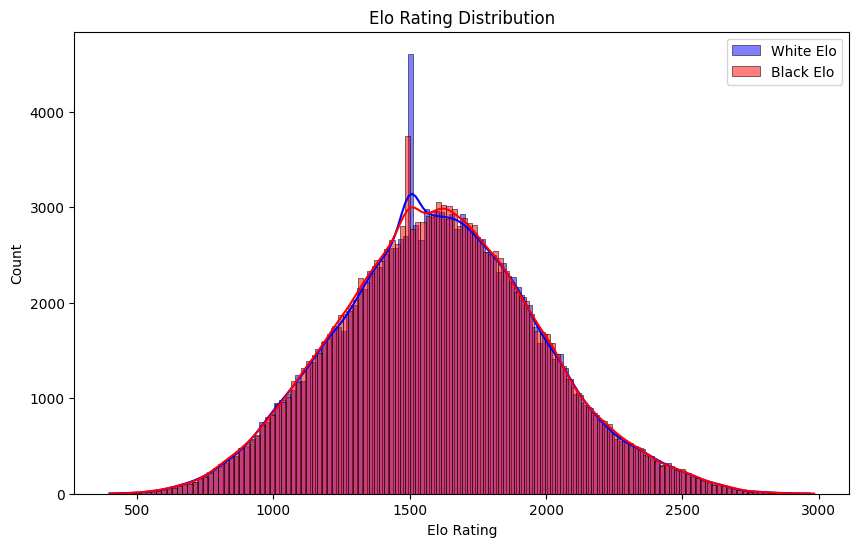

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_last['WhiteElo'], color='blue', label='White Elo', kde=True)
sns.histplot(df_last['BlackElo'], color='red', label='Black Elo', kde=True)
plt.title('Elo Rating Distribution')
plt.xlabel('Elo Rating')
plt.legend()
plt.show()

In [20]:
df_last["WhiteElo"].describe()

count    145505.000000
mean       1608.441339
std         372.023691
min         400.000000
25%        1357.000000
50%        1601.000000
75%        1854.000000
max        2966.000000
Name: WhiteElo, dtype: float64

In [21]:
df_last["BlackElo"].describe()

count    145505.00000
mean       1608.60044
std         372.19704
min         400.00000
25%        1355.00000
50%        1603.00000
75%        1855.00000
max        2983.00000
Name: BlackElo, dtype: float64

In [22]:
df_last["Termination"].value_counts()

Termination
Normal              79254
Time forfeit        15602
Rules infraction        3
Abandoned               1
Name: count, dtype: int64

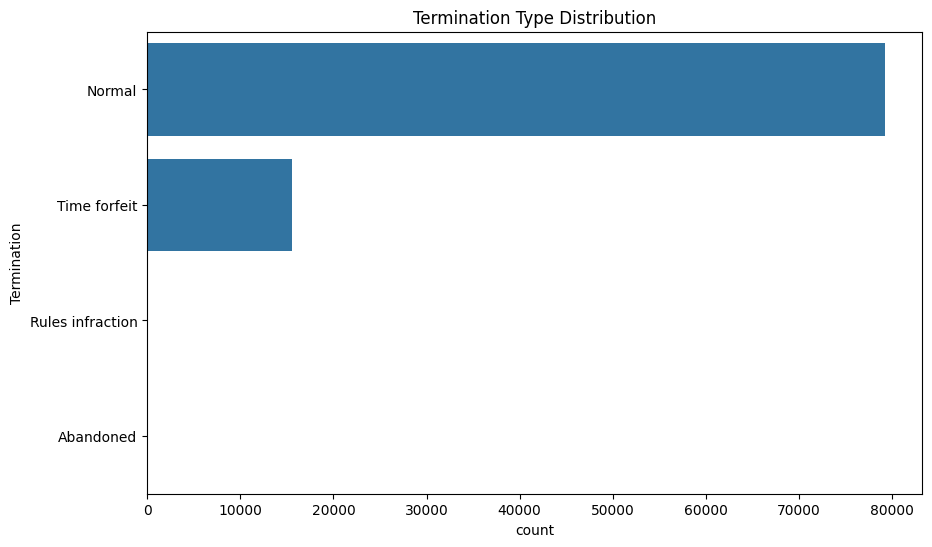

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Termination', data=df_last, order=df_last['Termination'].value_counts().index)
plt.title('Termination Type Distribution')
plt.show()

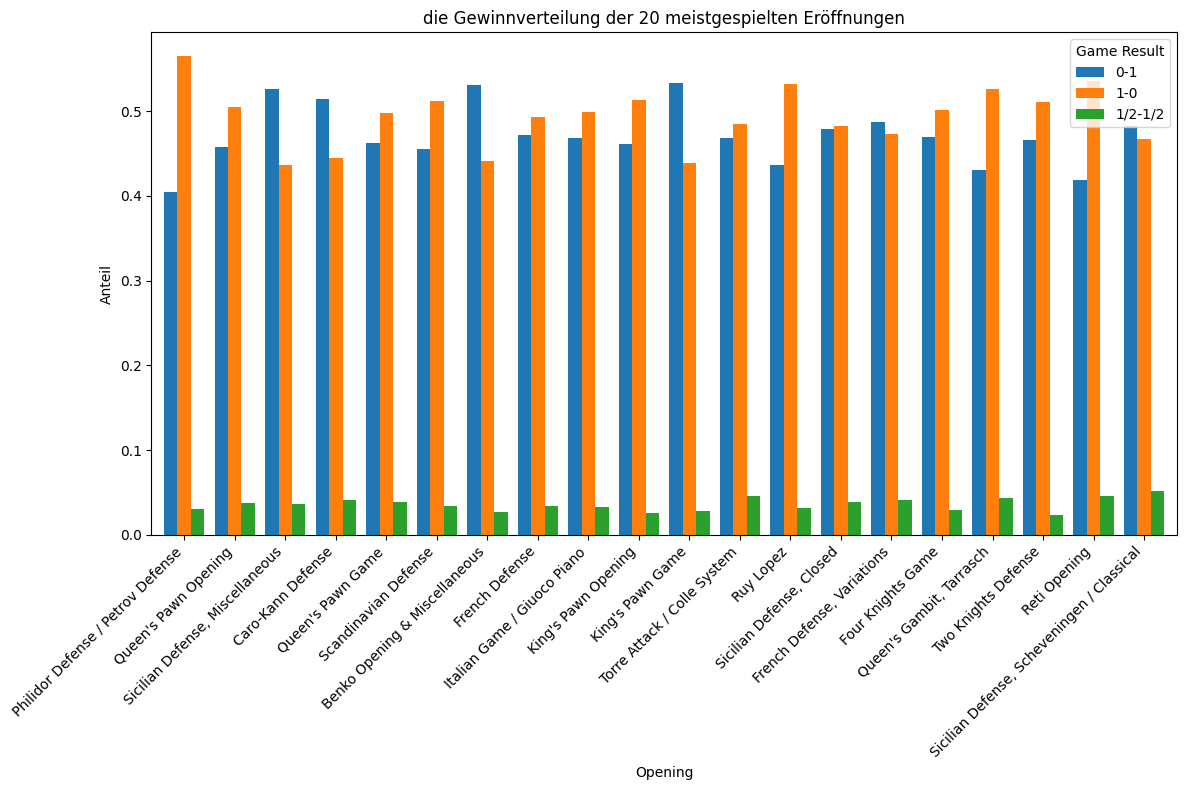

In [24]:
df_last = df_last[~df_last['Result'].str.contains(r'\*', na=False)]
opening_results = df_last.groupby('Openings')['Result'].value_counts(normalize=True).unstack().fillna(0)

frequent_openings = df_last['Openings'].value_counts()
top_openings = frequent_openings[frequent_openings >= 2195].index
opening_results = opening_results.loc[top_openings]

opening_results.plot(kind='bar', figsize=(12, 8), width=0.8)

plt.title('die Gewinnverteilung der 20 meistgespielten Eröffnungen')
plt.xlabel('Opening')
plt.ylabel('Anteil')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Game Result', loc='upper right')
plt.tight_layout()
plt.show()

In [25]:
df_last["Result"].describe()

count     145503
unique         3
top          1-0
freq       72420
Name: Result, dtype: object

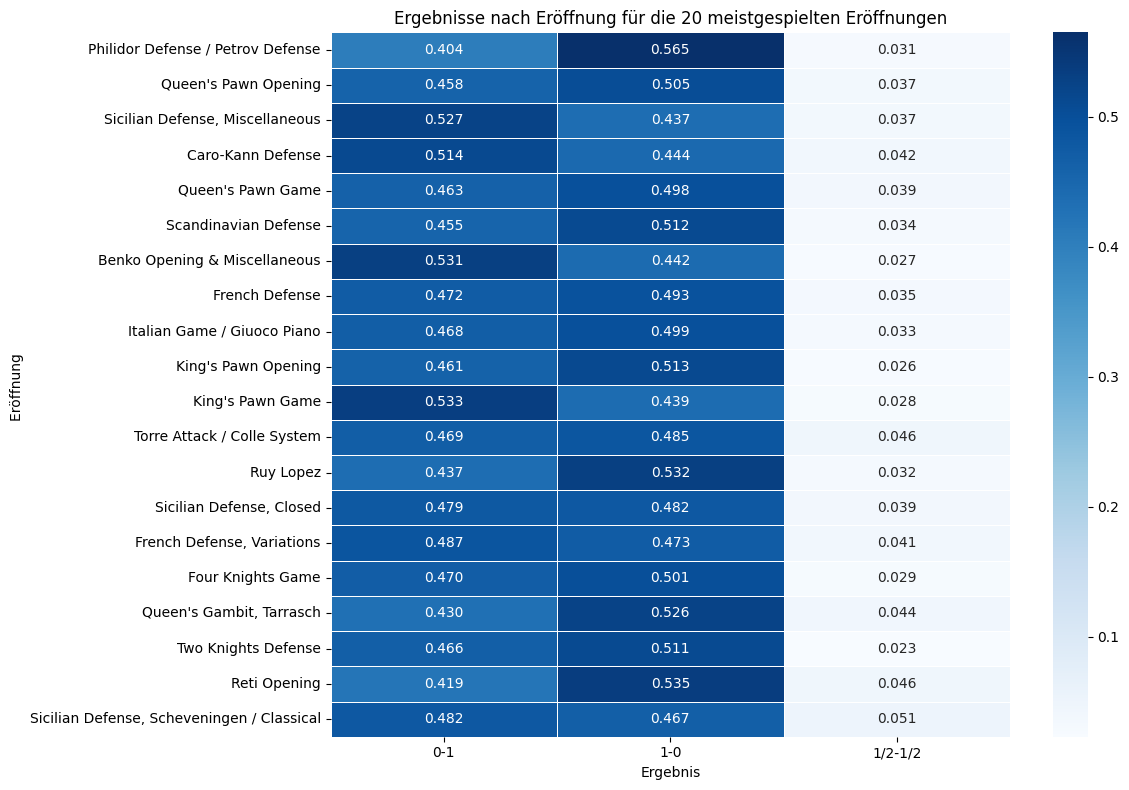

In [26]:
opening_results = df_last.groupby('Openings')['Result'].value_counts(normalize=True).unstack().fillna(0)

frequent_openings = df_last['Openings'].value_counts()
top_openings = frequent_openings[frequent_openings >= 2195].index
opening_results = opening_results.loc[top_openings]

plt.figure(figsize=(12, 8))
sns.heatmap(opening_results, annot=True, cmap='Blues', cbar=True, fmt=".3f", linewidths=.5)

plt.title('Ergebnisse nach Eröffnung für die 20 meistgespielten Eröffnungen')
plt.xlabel('Ergebnis')
plt.ylabel('Eröffnung ')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
df_last['Time'] = pd.to_datetime(df_last['Time'])

C:\Users\Berk\AppData\Local\Temp\ipykernel_3892\3394115818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_last['Time'] = pd.to_datetime(df_last['Time'])
C:\Users\Berk\AppData\Local\Temp\ipykernel_3892\3394115818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['Time'] = pd.to_datetime(df_last['Time'])


In [28]:
df_last['Time'] = df_last['Time'].dt.hour
df_last['Time'] = np.where((df_last['Time'] >= 6) & (df_last['Time'] < 12), 'Morning',
                   np.where((df_last['Time'] >= 12) & (df_last['Time'] < 18), 'Afternoon',
                            np.where((df_last['Time'] >= 18) & (df_last['Time'] < 22), 'Evening', 'Night')))
df_last['Time']

C:\Users\Berk\AppData\Local\Temp\ipykernel_3892\984329006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['Time'] = df_last['Time'].dt.hour
C:\Users\Berk\AppData\Local\Temp\ipykernel_3892\984329006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['Time'] = np.where((df_last['Time'] >= 6) & (df_last['Time'] < 12), 'Morning',


0           Evening
1           Evening
2           Morning
3           Evening
4           Morning
            ...    
145500      Evening
145501    Afternoon
145502      Morning
145503      Morning
145504        Night
Name: Time, Length: 145503, dtype: object

In [29]:
df_last['Eval']

0         ['0.2', '0.17', '0.21', '0.64', '0.43', '2.24'...
1         ['0.23', '0.22', '0.18', '0.31', '0.18', '0.11...
2         ['0.15', '0.25', '0.12', '0.6', '0.7', '0.63',...
3         ['0.07', '0.15', '0.05', '0.17', '0.0', '0.1',...
4         ['0.2', '0.17', '0.0', '0.0', '0.0', '0.29', '...
                                ...                        
145500    ['-0.12', '0.0', '-0.36', '0.0', '-0.4', '0.0'...
145501    ['0.2', '0.33', '-0.11', '0.04', '-0.55', '-0....
145502    ['0.2', '0.17', '0.21', '0.32', '0.17', '0.16'...
145503    ['0.2', '0.95', '0.85', '0.75', '0.44', '1.53'...
145504    ['0.13', '0.27', '0.0', '0.3', '0.11', '0.12',...
Name: Eval, Length: 145503, dtype: object

In [20]:
df_last['Eval_without_mat'] = df_last['Eval'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [21]:
df_last['Eval_without_mat']

0         [0.2, 0.17, 0.21, 0.64, 0.43, 2.24, 1.71, 2.62...
1         [0.23, 0.22, 0.18, 0.31, 0.18, 0.11, 0.24, 0.5...
2         [0.15, 0.25, 0.12, 0.6, 0.7, 0.63, 0.4, 0.88, ...
3         [0.07, 0.15, 0.05, 0.17, 0.0, 0.1, 0.05, 0.84,...
4         [0.2, 0.17, 0.0, 0.0, 0.0, 0.29, 0.48, 0.4, 0....
                                ...                        
145500    [-0.12, 0.0, -0.36, 0.0, -0.4, 0.0, 0.0, 0.4, ...
145501    [0.2, 0.33, -0.11, 0.04, -0.55, -0.11, -0.53, ...
145502    [0.2, 0.17, 0.21, 0.32, 0.17, 0.16, 0.17, 0.12...
145503    [0.2, 0.95, 0.85, 0.75, 0.44, 1.53, 0.84, 1.51...
145504    [0.13, 0.27, 0.0, 0.3, 0.11, 0.12, 0.12, 0.5, ...
Name: Eval_without_mat, Length: 145505, dtype: object

In [22]:
df_last['Eval_without_mat'] = df_last['Eval_without_mat'].apply(
    lambda x: [float(v) if isinstance(v, str) and not v.startswith('#') else 0 for v in x]
    if isinstance(x, list) else []
)

# Kontrol için ilk birkaç satırı göster
print(df_last['Eval_without_mat'].head())

0    [0.2, 0.17, 0.21, 0.64, 0.43, 2.24, 1.71, 2.62...
1    [0.23, 0.22, 0.18, 0.31, 0.18, 0.11, 0.24, 0.5...
2    [0.15, 0.25, 0.12, 0.6, 0.7, 0.63, 0.4, 0.88, ...
3    [0.07, 0.15, 0.05, 0.17, 0.0, 0.1, 0.05, 0.84,...
4    [0.2, 0.17, 0.0, 0.0, 0.0, 0.29, 0.48, 0.4, 0....
Name: Eval_without_mat, dtype: object


In [23]:
# Tüm satırlara 0.2 eklemek
df_last['Eval_without_mat'] = df_last['Eval_without_mat'].apply(
    lambda x: [0.2] + (x if isinstance(x, list) else [])
)

# İlk birkaç satırı kontrol etme
print(df_last['Eval_without_mat'].head())


0    [0.2, 0.2, 0.17, 0.21, 0.64, 0.43, 2.24, 1.71,...
1    [0.2, 0.23, 0.22, 0.18, 0.31, 0.18, 0.11, 0.24...
2    [0.2, 0.15, 0.25, 0.12, 0.6, 0.7, 0.63, 0.4, 0...
3    [0.2, 0.07, 0.15, 0.05, 0.17, 0.0, 0.1, 0.05, ...
4    [0.2, 0.2, 0.17, 0.0, 0.0, 0.0, 0.29, 0.48, 0....
Name: Eval_without_mat, dtype: object


In [31]:
# Complexity ve Eval analizleri için hamleleri sütunlara ayır
complexity_columns = df_last['Complexity_Per_Move'].apply(
    lambda x: pd.Series(x[:21]) if isinstance(x, list) else pd.Series([np.nan] * 21)
)
eval_columns = df_last['Eval_without_mat'].apply(
    lambda x: pd.Series(x[:21]) if isinstance(x, list) else pd.Series([np.nan] * 21)
)

# İsimlendirme
complexity_columns.columns = [f"Complexity_Move_{i+1}" for i in range(21)]
eval_columns.columns = [f"Eval_Move_{i+1}" for i in range(21)]

# Tabloyu genişlet
df_extended = pd.concat([df_last, complexity_columns, eval_columns], axis=1)

# Elo gruplarına ve hamlelere göre grup analizi
grouped = df_extended.groupby('White_Elo_Group')[
    [f"Complexity_Move_{i+1}" for i in range(21)] + [f"Eval_Move_{i+1}" for i in range(21)]
].mean()

# Sonuç: Tablolaştırılmış veri
grouped

,Complexity_Move_1,Complexity_Move_2,Complexity_Move_3,Complexity_Move_4,Complexity_Move_5,Complexity_Move_6,Complexity_Move_7,Complexity_Move_8,Complexity_Move_9,Complexity_Move_10,...,Eval_Move_12,Eval_Move_13,Eval_Move_14,Eval_Move_15,Eval_Move_16,Eval_Move_17,Eval_Move_18,Eval_Move_19,Eval_Move_20,Eval_Move_21
White_Elo_Group,,,,,,,,,,,,,,,,,,,,,
Advanced,7.8,10.266206,9.471388,10.865175,10.610577,11.655380,11.000810,12.149718,11.390405,12.434944,...,0.129971,0.430973,0.128170,0.455359,0.123383,0.450044,0.116582,0.474175,0.101117,0.496365
Beginner,7.8,10.320775,9.852227,10.821185,10.661683,11.548180,10.968438,11.907329,11.278395,12.129930,...,-0.025879,0.655377,-0.040959,0.677522,-0.071775,0.672706,-0.086753,0.695258,-0.119175,0.688493
Expert,7.8,10.165855,9.219876,10.856720,10.356984,11.648189,10.830873,12.130500,11.253762,12.396709,...,0.179424,0.389603,0.184914,0.406920,0.204677,0.413166,0.190254,0.429681,0.182093,0.445435
Intermediate,7.8,10.318458,9.709558,10.807346,10.717653,11.617261,11.016445,12.043001,11.346229,12.313469,...,0.064982,0.496654,0.059360,0.538279,0.050410,0.525307,0.030552,0.550522,0.009014,0.570032


In [25]:
index = ["Advanced", "Beginner", "Expert", "Intermediate"]
df_transposed = pd.DataFrame(grouped, index=index)
df_transposed = df_transposed.T
df_transposed

,Advanced,Beginner,Expert,Intermediate
Complexity_Move_1,7.800000,7.800000,7.800000,7.800000
Complexity_Move_2,10.266206,10.320775,10.165855,10.318458
Complexity_Move_3,9.471388,9.852227,9.219876,9.709558
Complexity_Move_4,10.865175,10.821185,10.856720,10.807346
Complexity_Move_5,10.610577,10.661683,10.356984,10.717653
Complexity_Move_6,11.655380,11.548180,11.648189,11.617261
Complexity_Move_7,11.000810,10.968438,10.830873,11.016445
Complexity_Move_8,12.149718,11.907329,12.130500,12.043001
Complexity_Move_9,11.390405,11.278395,11.253762,11.346229
Complexity_Move_10,12.434944,12.129930,12.396709,12.313469


In [30]:
index = ["'Philidor Defense / Petrov Defense'"]
der2 = pd.DataFrame(grouped2, index=index)
der2


,Complexity_Move_1,Complexity_Move_2,Complexity_Move_3,Complexity_Move_4,Complexity_Move_5,Complexity_Move_6,Complexity_Move_7,Complexity_Move_8,Complexity_Move_9,Complexity_Move_10,Eval_Move_1,Eval_Move_2,Eval_Move_3,Eval_Move_4,Eval_Move_5,Eval_Move_6,Eval_Move_7,Eval_Move_8,Eval_Move_9,Eval_Move_10
'Philidor Defense / Petrov Defense',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
grouped2=grouped2.T
grouped2

Openings           Alekhine's Defense                                     \
White_Elo_Group              Advanced   Beginner     Expert Intermediate   
Complexity_Move_1            7.800000   7.800000   7.800000     7.800000   
Complexity_Move_2           10.800000  10.818021  10.777157    10.797094   
Complexity_Move_3            8.277865   8.541166   8.238325     8.405932   
Complexity_Move_4           11.034494  11.227032  11.012437    11.054358   
Complexity_Move_5            9.276629   9.498940   9.238832     9.381598   
Complexity_Move_6           11.745506  11.574558  11.965990    11.782930   
Complexity_Move_7            9.882247  10.136396  10.068782     9.992736   
Complexity_Move_8           12.137978  11.607774  12.103553    11.879419   
Complexity_Move_9           10.654719  10.631607  10.753046    10.769249   
Complexity_Move_10          11.804045  11.709286  12.019036    11.848063   
Eval_Move_1                  0.200000   0.200000   0.200000     0.200000   
Eval_Move_2                  0.224944   0.221201   0.206802     0.227700   
Eval_Move_3                  0.441213   0.470848   0.361421     0.468959   
Eval_Move_4                  0.437124   0.096608   0.487563     0.332203   
Eval_Move_5                  0.577213   0.586325   0.554619     0.537700   
Eval_Move_6                  0.381618   0.076360   0.366041     0.309298   
Eval_Move_7                  0.597978   0.587527   0.552335     0.614625   
Eval_Move_8                  0.338809  -0.070565   0.311015     0.275593   
Eval_Move_9                  0.529573   0.602438   0.516142     0.630557   
Eval_Move_10                 0.200629   0.034357   0.294924     0.191235   

Openings           Benko Opening & Miscellaneous                        \
White_Elo_Group                         Advanced   Beginner     Expert   
Complexity_Move_1                       7.800000   7.800000   7.800000   
Complexity_Move_2                       8.810526   9.306081   8.600625   
Complexity_Move_3                       9.701886   9.957872   9.462344   
Complexity_Move_4                       9.807061  10.127162   9.747500   
Complexity_Move_5                      10.952544  10.753986  10.500938   
Complexity_Move_6                      10.597895  10.715845  10.421250   
Complexity_Move_7                      11.464211  11.180541  11.081250   
Complexity_Move_8                      11.186743  11.004770  11.039062   
Complexity_Move_9                      11.791176  11.515562  11.611094   
Complexity_Move_10                     11.498990  11.129296  11.484219   
Eval_Move_1                             0.200000   0.200000   0.200000   
Eval_Move_2                            -0.169281  -0.106588  -0.170937   
Eval_Move_3                            -0.021825   0.071216   0.009594   
Eval_Move_4                            -0.266167  -0.380027  -0.280531   
Eval_Move_5                            -0.020851   0.050878  -0.041844   
Eval_Move_6                            -0.297412  -0.450236  -0.267687   
Eval_Move_7                            -0.017114  -0.012203  -0.058406   
Eval_Move_8                            -0.245018  -0.504831  -0.306375   
Eval_Move_9                             0.040746  -0.024939  -0.108344   
Eval_Move_10                           -0.207164  -0.560149  -0.306375   

Openings                        Benoni Defense           ...  \
White_Elo_Group    Intermediate       Advanced   Expert  ...   
Complexity_Move_1      7.800000       7.800000   7.8000  ...   
Complexity_Move_2      9.143565      10.267059  10.1820  ...   
Complexity_Move_3      9.907841       8.544706   8.4300  ...   
Complexity_Move_4     10.029886      10.807059  10.8060  ...   
Complexity_Move_5     11.058770       9.123529   8.9040  ...   
Complexity_Move_6     10.743851      11.203529  11.2300  ...   
Complexity_Move_7     11.460605       9.707059   9.6400  ...   
Complexity_Move_8     11.191106      11.900588  12.0550  ...   
Complexity_Move_9     11.682061       9.801176   9.6210  .

In [34]:
#grouped2.to_excel('avg_comp_openings.xlsx')

In [75]:
#top_moves.to_excel('moves_with_complexity.xlsx', index=False)

In [79]:
#df_transposed.to_excel('elogroup_with_complexity.xlsx', index=False)